In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from IPython.display import Image  
from os import system
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.<br>

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.<br>

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.<br>

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)<br>

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)<br>

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.<br>

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)<br>

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [171]:
df = pd.read_excel('Election_Data (1).xlsx', sheet_name='Election_Dataset_Two Classes')


In [30]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


In [172]:
df.drop("Unnamed: 0" , axis = 1,inplace=True)


In [33]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [34]:
df.tail()

vote  age  economic.cond.national  economic.cond.household  \
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [36]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [37]:
# Are there any missing values ?
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [38]:
print('Number of duplicate rows = %d' % df.duplicated().sum())



Number of duplicate rows = 8


In [39]:
df[df.duplicated()]

vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [173]:
df.drop_duplicates(inplace=True)

In [174]:
df.reset_index(drop=True,inplace=True)

In [269]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [270]:
df.tail()

vote  age  economic.cond.national  economic.cond.household  \
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
1512      2      4      11                    3    male  
1513      4      4       8                    2    male  
1514      5      4       2                    2    male  
1515      1      4      11                    2    male  
1516      2      4      11                    0  female

In [126]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1517 
no. of columns:  9


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 106.8+ KB


In [271]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [130]:
df[cat].describe().T

count unique     top  freq
vote    1517      2  Labour  1057
gender  1517      2  female   808

In [131]:
df[num].describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic.cond.national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic.cond.household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political.knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [132]:
# Checking the Skewness in data
df.skew(axis=0)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [175]:
df ['age_cat'] = pd.cut (df ['age'], bins= [0,35,50,65,80,100], labels= ['1', '2', '3','4','5'])


In [7]:
df[['vote','age_cat','gender']].describe().T

count unique     top  freq
vote     1517      2  Labour  1057
age_cat  1517      5       2   475
gender   1517      2  female   808

In [8]:
df.dtypes

vote                         object
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Europe                        int64
political.knowledge           int64
gender                       object
age_cat                    category
dtype: object

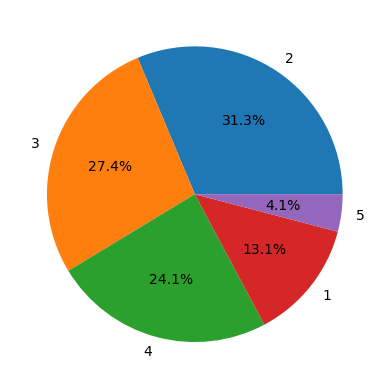

In [274]:
labels = df['age_cat'].value_counts().keys()
plt.pie(df['age_cat'].value_counts(), autopct="%.1f%%", labels=labels)
plt.show()

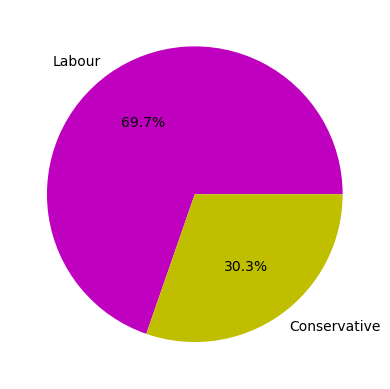

In [275]:
labels = df['vote'].value_counts().keys()
mycolors =  ['g', 'y']
plt.pie(df['vote'].value_counts(), autopct="%.1f%%", labels=labels,colors='mycolors')
plt.show()

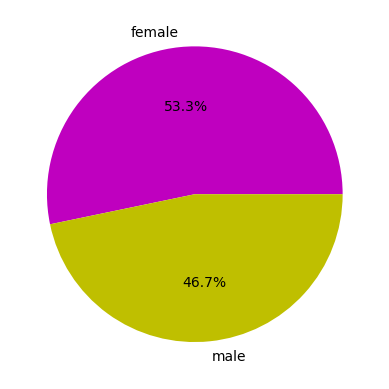

In [48]:
labels = df['gender'].value_counts().keys()
mycolors =  ['y', 'g']
plt.pie(df['gender'].value_counts(), autopct="%.1f%%", labels=labels,colors='mycolors')
plt.show()

In [276]:
df_cat=['vote', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender','age_cat']
for i in df_cat:
        print("Number of Unique Values of ",i.upper(),':',df[i].nunique())
        print("\n")
        print("Value Counts of ",i)
        print(df[i].value_counts().sort_values())
        print("\n")
        print("Percentage values of each category of ",i)
        print(df[i].value_counts(normalize=True).sort_values())
        print("\n")
        print("--------------------------------------------------------")
        

Number of Unique Values of  VOTE : 2


Value Counts of  vote
Conservative     460
Labour          1057
Name: vote, dtype: int64


Percentage values of each category of  vote
Conservative    0.30323
Labour          0.69677
Name: vote, dtype: float64


--------------------------------------------------------
Number of Unique Values of  ECONOMIC.COND.NATIONAL : 5


Value Counts of  economic.cond.national
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


Percentage values of each category of  economic.cond.national
1    0.024390
5    0.054054
2    0.168754
4    0.354647
3    0.398154
Name: economic.cond.national, dtype: float64


--------------------------------------------------------
Number of Unique Values of  ECONOMIC.COND.HOUSEHOLD : 5


Value Counts of  economic.cond.household
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


Percentage values of each category of  economic.cond.household
1    0.042848
5 

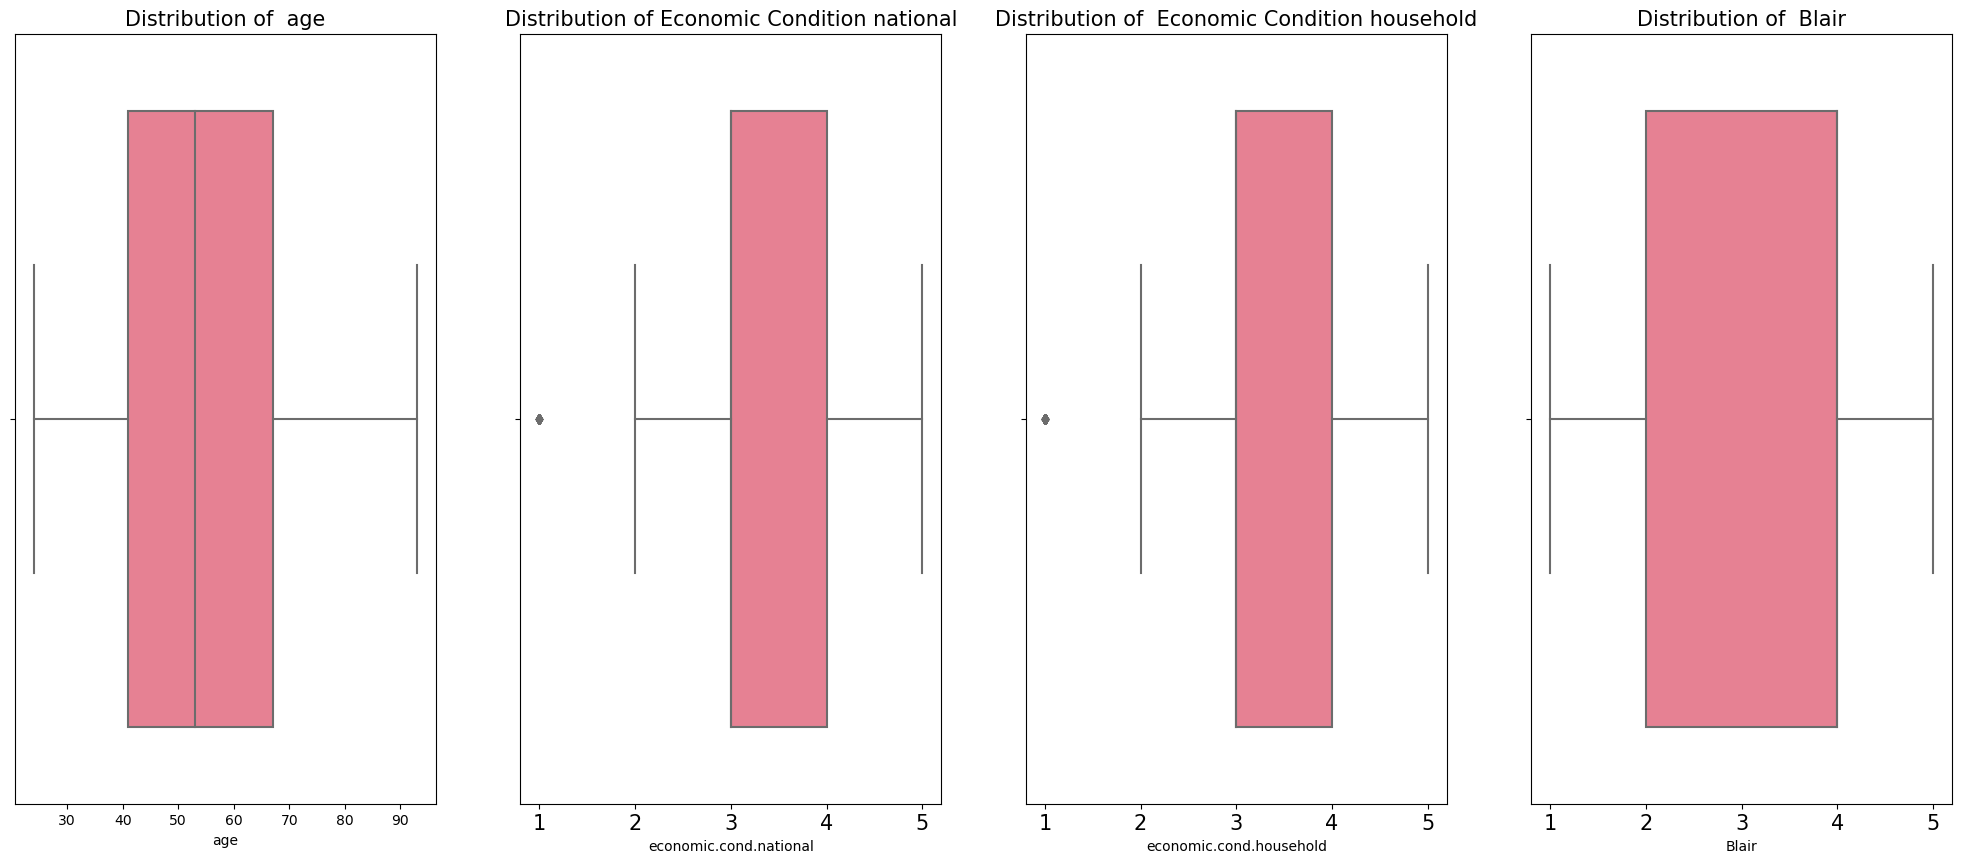

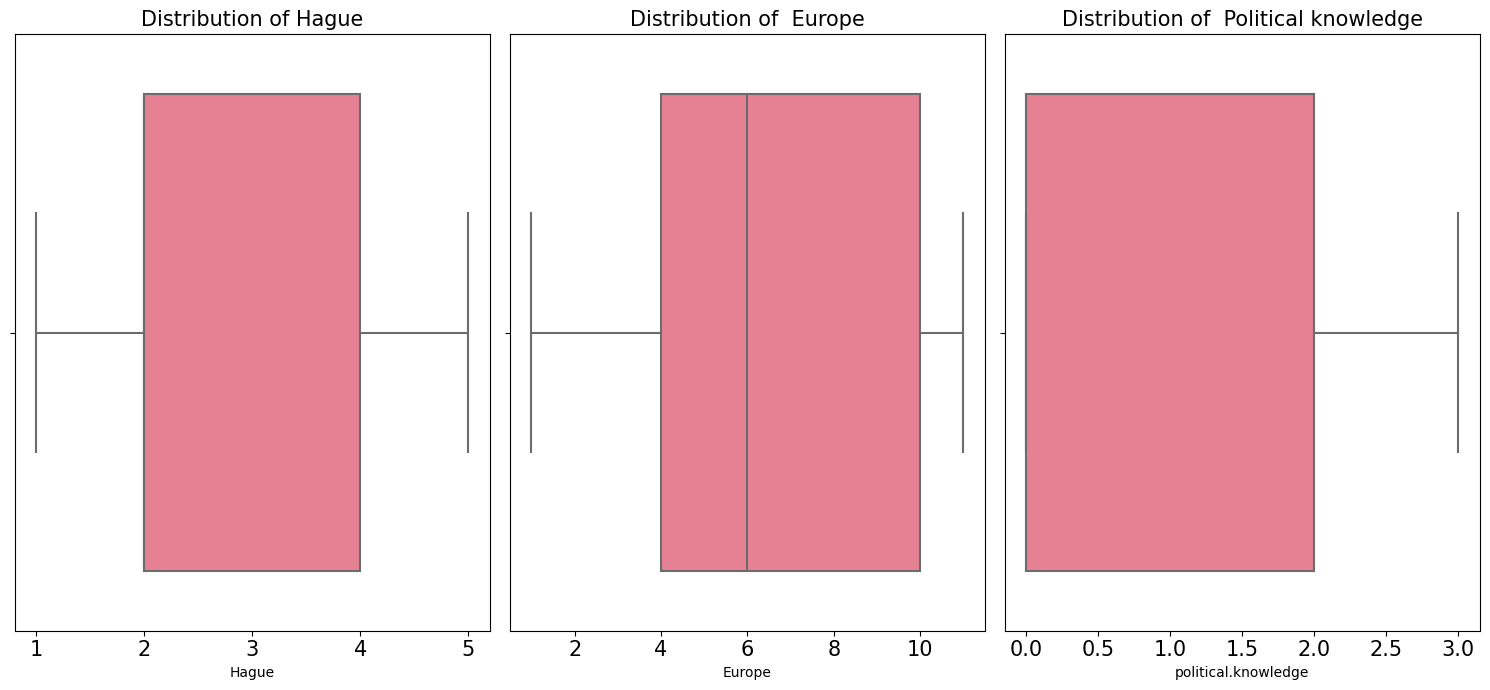

In [255]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,10))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(15,7))
sns.boxplot(data=df,x='age',palette='husl',ax=ax1)
ax1.set_title('Distribution of  age', fontsize=15)
sns.boxplot(data=df,x='economic.cond.national',palette='husl',ax=ax2)
ax2.set_title('Distribution of Economic Condition national', fontsize=15)
ax2.tick_params(labelsize=15)
sns.boxplot(data=df,x='economic.cond.household',palette='husl',ax=ax3)
ax3.set_title('Distribution of  Economic Condition household', fontsize=15)
ax3.tick_params(labelsize=15)
sns.boxplot(data=df,x='Blair',palette='husl',ax=ax4)
ax4.set_title('Distribution of  Blair', fontsize=15)
ax4.tick_params(labelsize=15)
sns.boxplot(data=df,x='Hague',palette='husl',ax=ax5)
ax5.set_title('Distribution of Hague', fontsize=15)
ax5.tick_params(labelsize=15)
sns.boxplot(data=df,x='Europe',palette='husl',ax=ax6)
ax6.set_title('Distribution of  Europe', fontsize=15)
ax6.tick_params(labelsize=15)
sns.boxplot(data=df,x='political.knowledge',palette='husl',ax=ax7)
ax7.set_title('Distribution of  Political knowledge', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

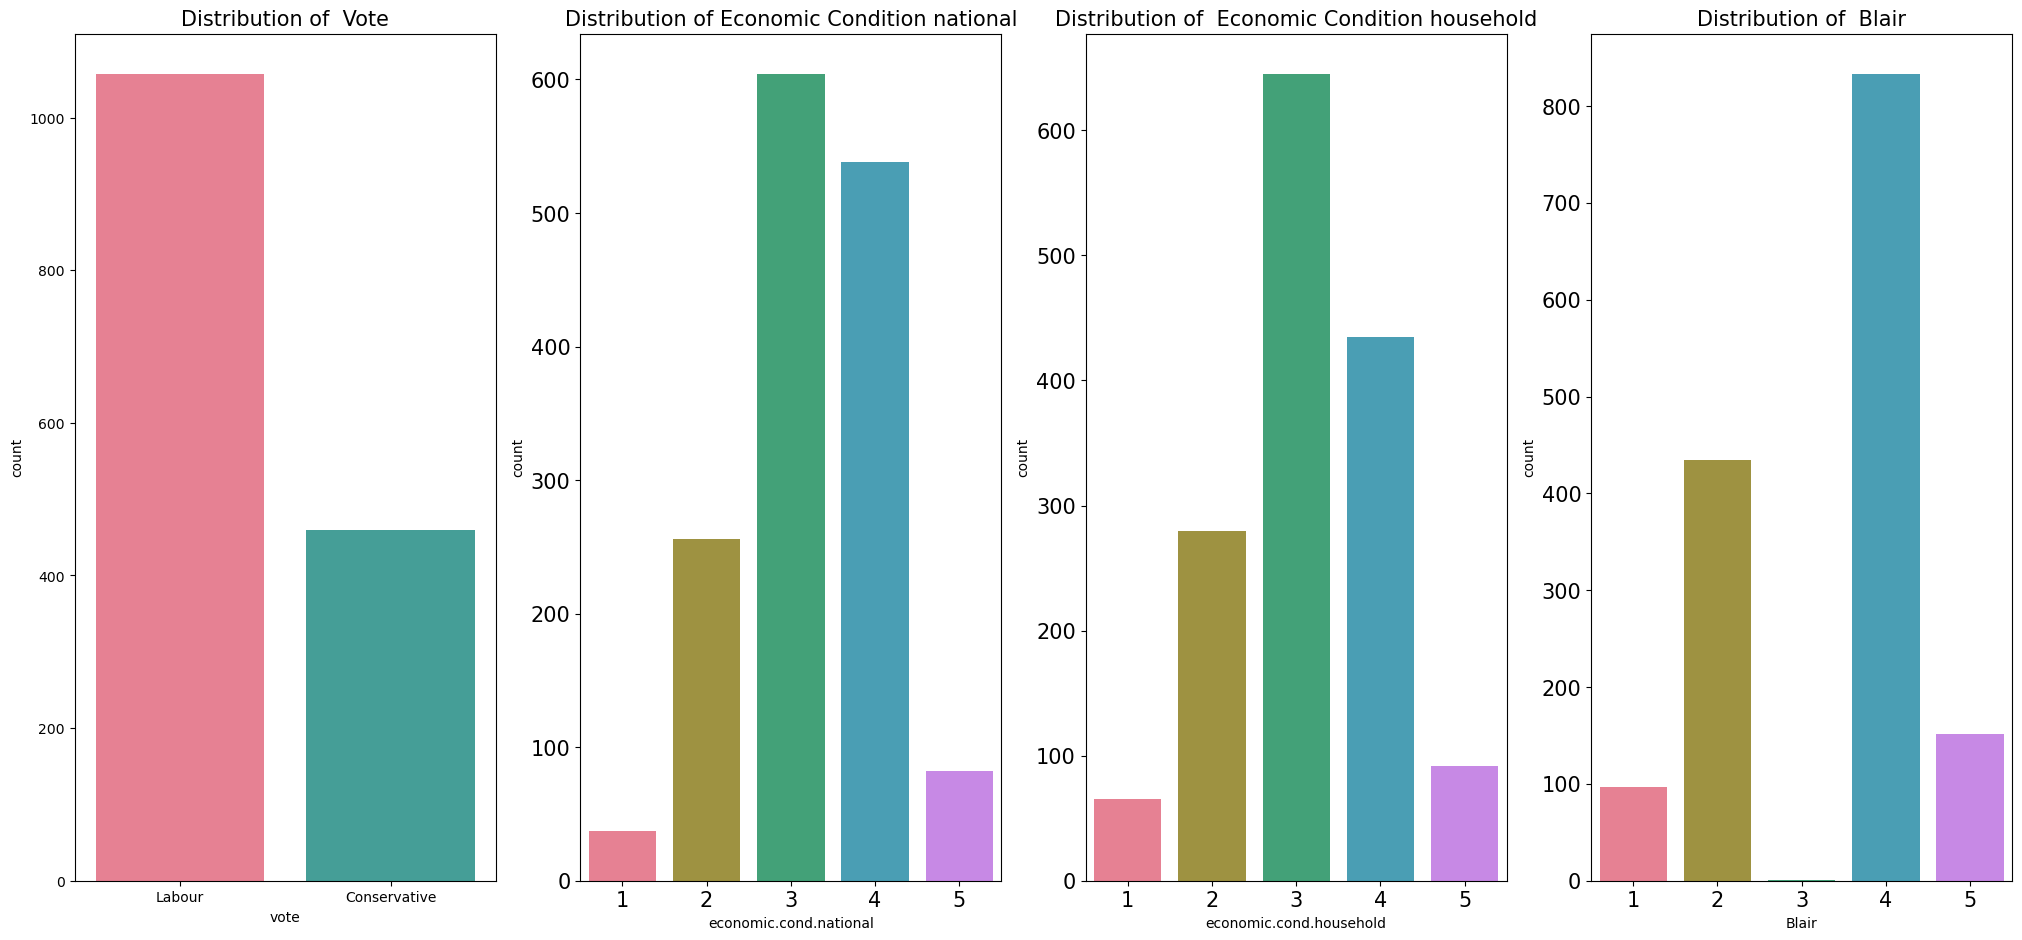

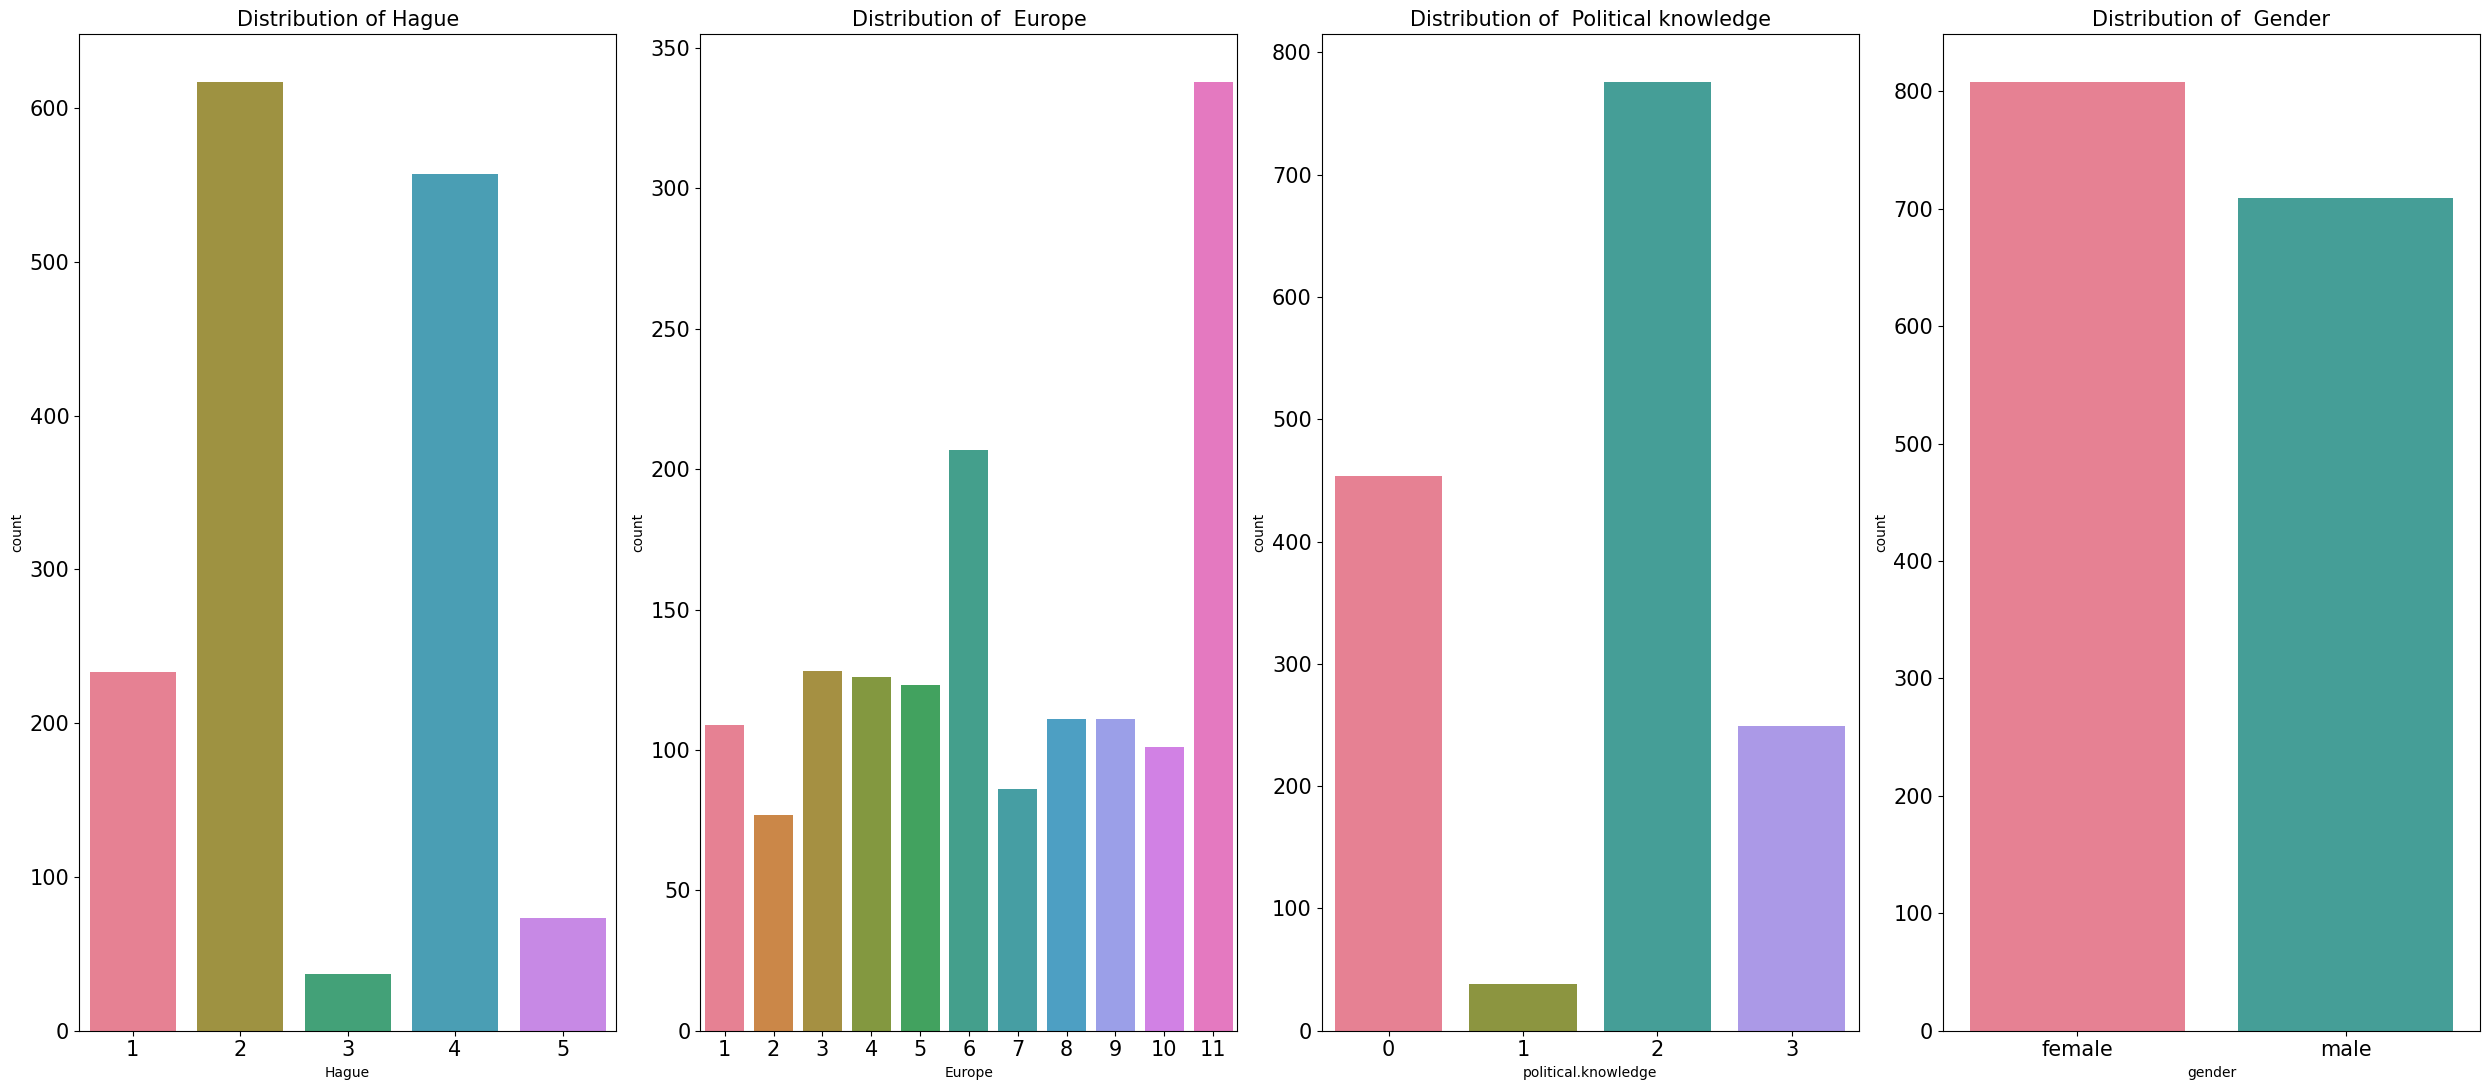

In [263]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,11))
fig, (ax5,ax6,ax7,ax8)=plt.subplots(1,4,figsize=(25,11))
sns.countplot(data=df,x='vote',palette='husl',ax=ax1)
ax1.set_title('Distribution of  Vote', fontsize=15)
sns.countplot(data=df,x='economic.cond.national',palette='husl',ax=ax2)
ax2.set_title('Distribution of Economic Condition national', fontsize=15)
ax2.tick_params(labelsize=15)
sns.countplot(data=df,x='economic.cond.household',palette='husl',ax=ax3)
ax3.set_title('Distribution of  Economic Condition household', fontsize=15)
ax3.tick_params(labelsize=15)
sns.countplot(data=df,x='Blair',palette='husl',ax=ax4)
ax4.set_title('Distribution of  Blair', fontsize=15)
ax4.tick_params(labelsize=15)
sns.countplot(data=df,x='Hague',palette='husl',ax=ax5)
ax5.set_title('Distribution of Hague', fontsize=15)
ax5.tick_params(labelsize=15)
sns.countplot(data=df,x='Europe',palette='husl',ax=ax6)
ax6.set_title('Distribution of  Europe', fontsize=15)
ax6.tick_params(labelsize=15)
sns.countplot(data=df,x='political.knowledge',palette='husl',ax=ax7)
ax7.set_title('Distribution of  Political knowledge', fontsize=15)
ax7.tick_params(labelsize=15)
sns.countplot(data=df,x='gender',palette='husl',ax=ax8)
ax8.set_title('Distribution of  Gender', fontsize=15)
ax8.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Bivariate Analysis  Numerical Vs Numerical

<AxesSubplot:>

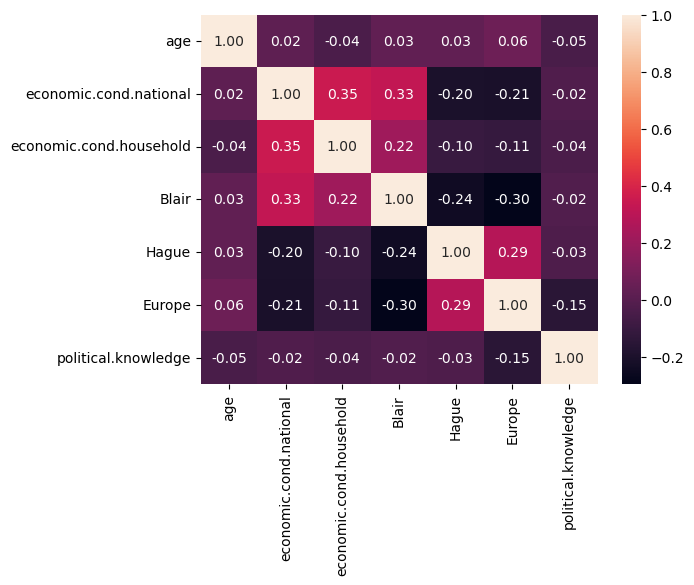

In [257]:
sns.heatmap(df.corr(),fmt='.2f',annot=True)

## Bivariate Analysis  Categorical Vs Categorical

<AxesSubplot:xlabel='age_cat', ylabel='count'>

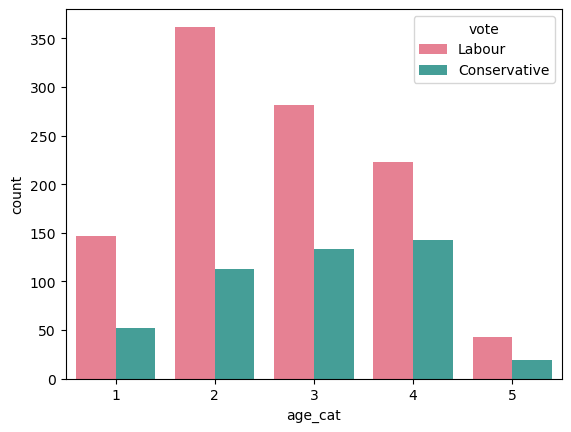

In [148]:
sns.countplot(data=df,x='age_cat',hue='vote',palette='husl')

<AxesSubplot:xlabel='vote', ylabel='count'>

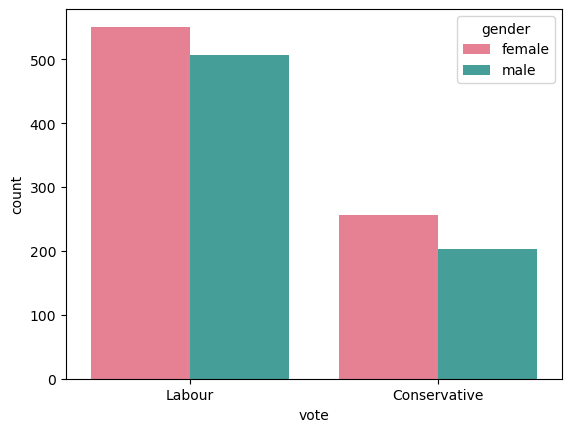

In [197]:
sns.countplot(data=df,x='vote',hue='gender',palette='husl')

In [198]:
df.groupby("vote")["gender"].value_counts(normalize=True)

vote          gender
Conservative  female    0.558696
              male      0.441304
Labour        female    0.521287
              male      0.478713
Name: gender, dtype: float64

## Bivariate Analysis  Numerical Vs Categorical

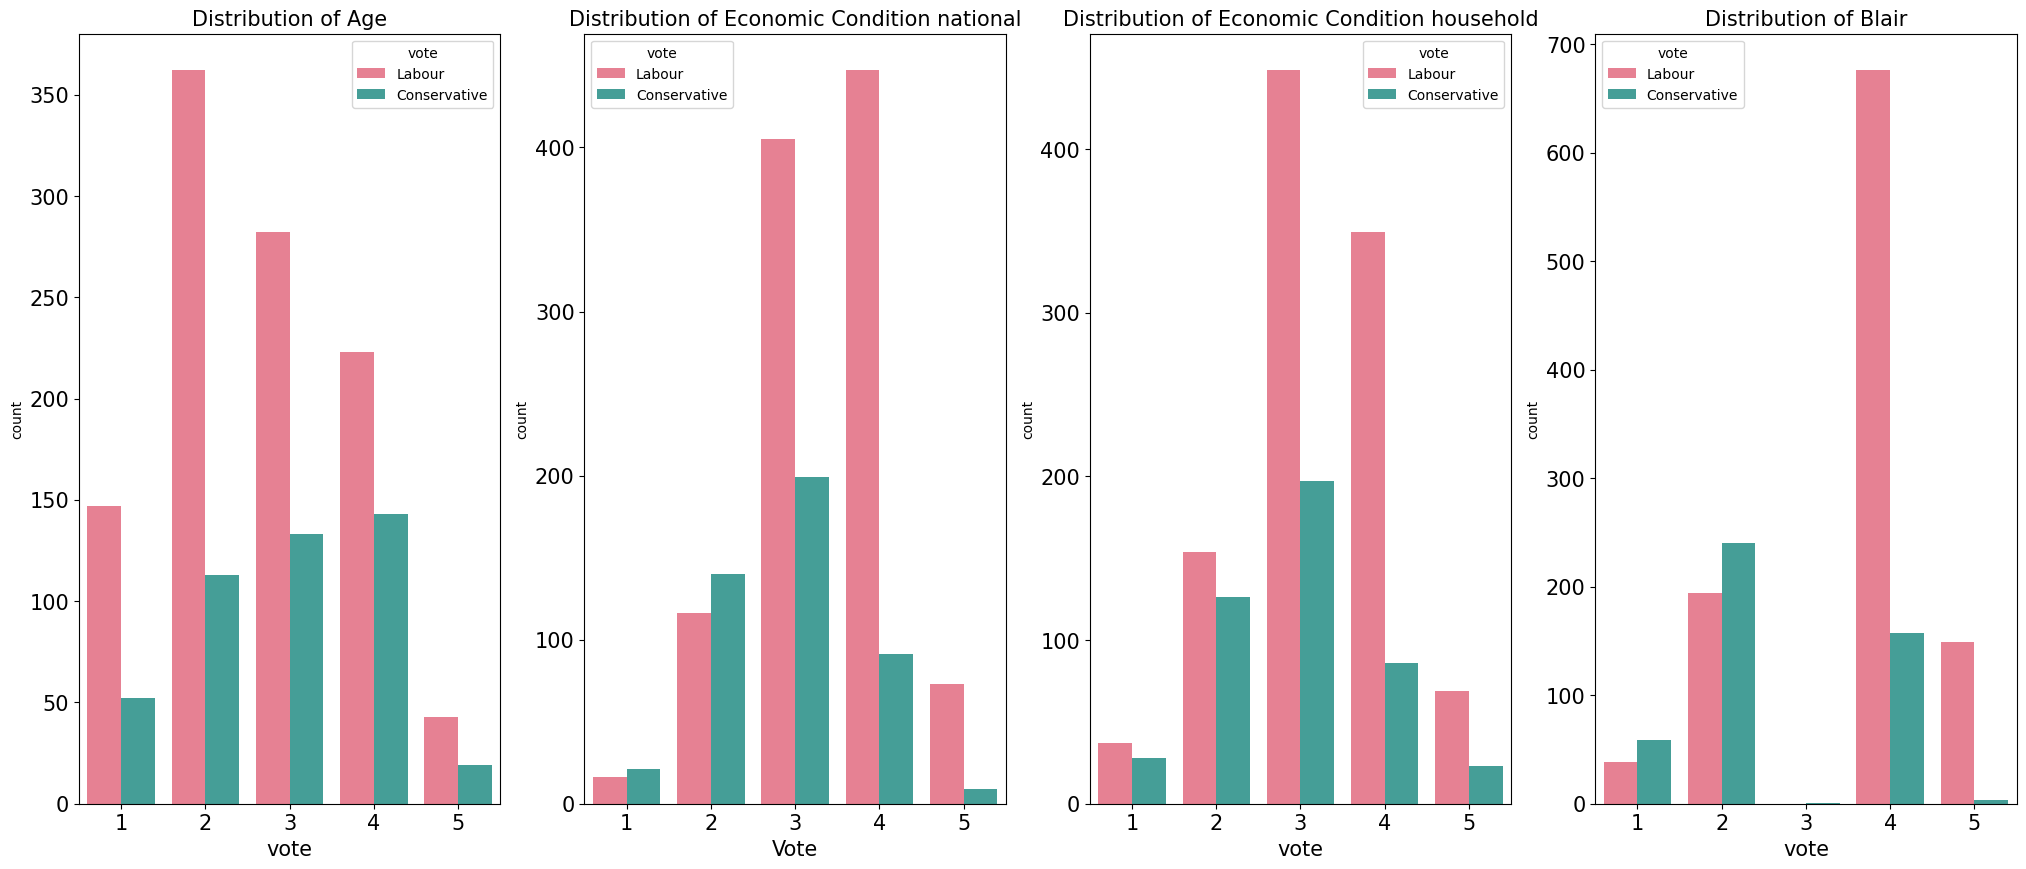

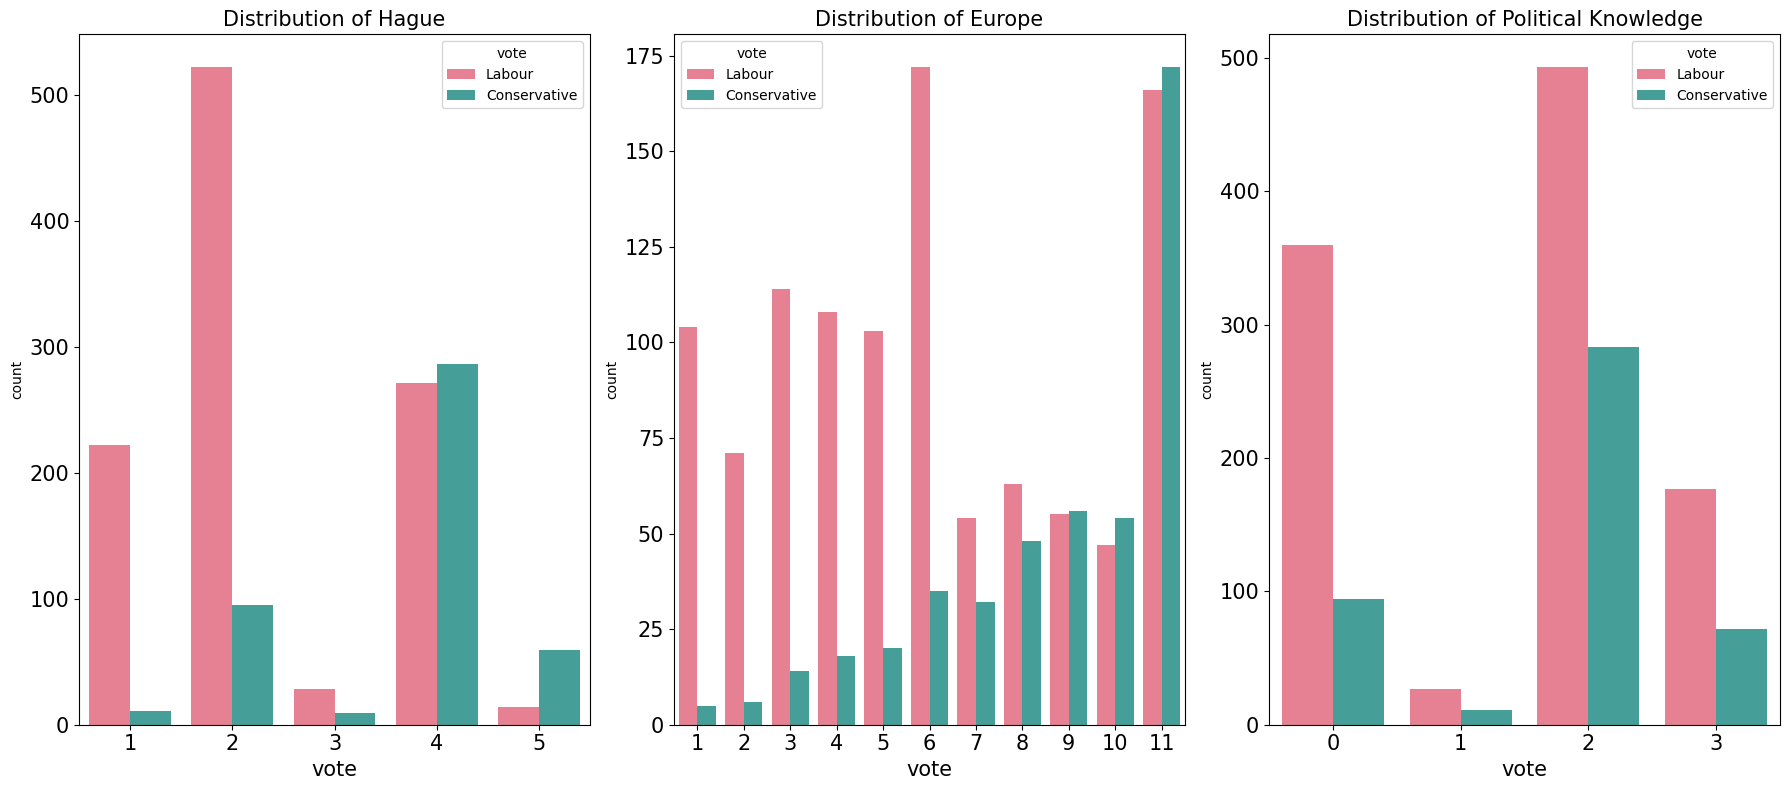

In [156]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,10))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(18,8))
sns.countplot(data=df,x='age_cat',hue='vote',palette='husl',ax=ax1)
ax1.set_xlabel('vote', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)
sns.countplot(data=df,x='economic.cond.national',hue='vote',palette='husl',ax=ax2)
ax2.set_xlabel('Vote', fontsize=15)
ax2.set_title('Distribution of Economic Condition national', fontsize=15)
ax2.tick_params(labelsize=15)
sns.countplot(data=df,x='economic.cond.household',hue='vote',palette='husl',ax=ax3)
ax3.set_xlabel('vote', fontsize=15)
ax3.set_title('Distribution of Economic Condition household', fontsize=15)
ax3.tick_params(labelsize=15)
sns.countplot(data=df,x='Blair',hue='vote',palette='husl',ax=ax4)
ax4.set_xlabel('vote', fontsize=15)
ax4.set_title('Distribution of Blair', fontsize=15)
ax4.tick_params(labelsize=15)
sns.countplot(data=df,x='Hague',hue='vote',palette='husl',ax=ax5)
ax5.set_xlabel('vote', fontsize=15)
ax5.set_title('Distribution of Hague', fontsize=15)
ax5.tick_params(labelsize=15)
sns.countplot(data=df,x='Europe',hue='vote',palette='husl',ax=ax6)
ax6.set_xlabel('vote', fontsize=15)
ax6.set_title('Distribution of Europe', fontsize=15)
ax6.tick_params(labelsize=15)
sns.countplot(data=df,x='political.knowledge',hue='vote',palette='husl',ax=ax7)
ax7.set_xlabel('vote', fontsize=15)
ax7.set_title('Distribution of Political Knowledge', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

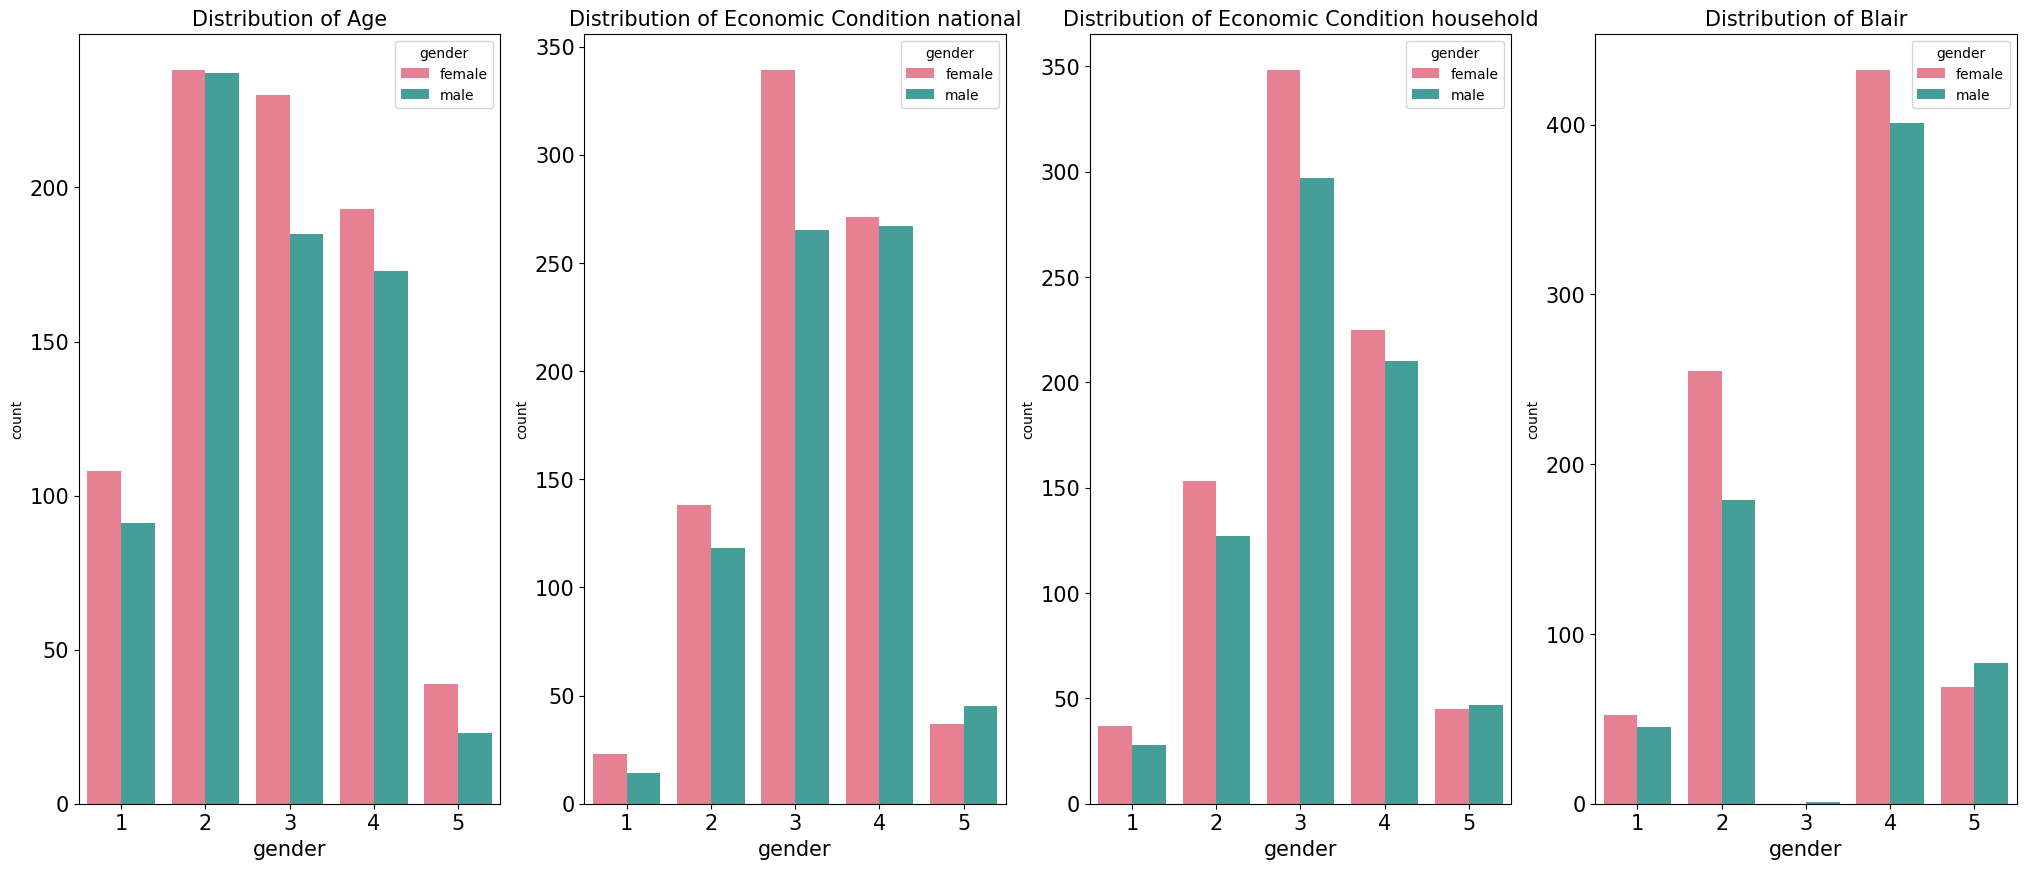

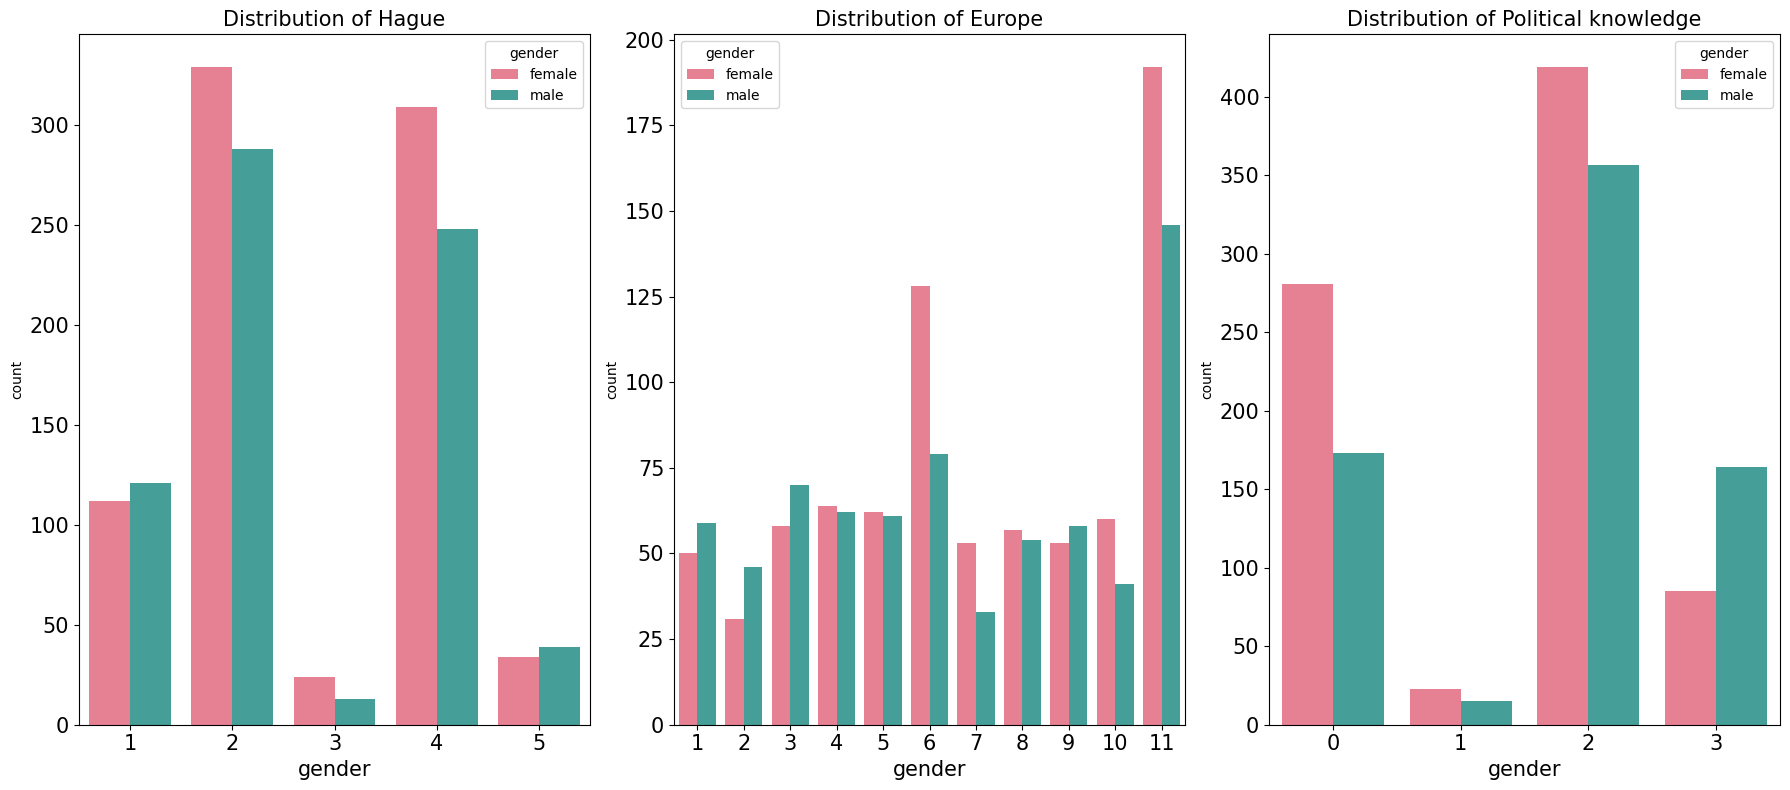

In [161]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,10))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(18,8))
sns.countplot(data=df,x='age_cat',hue='gender',palette='husl',ax=ax1)
ax1.set_xlabel('gender', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)
sns.countplot(data=df,x='economic.cond.national',hue='gender',palette='husl',ax=ax2)
ax2.set_xlabel('gender', fontsize=15)
ax2.set_title('Distribution of Economic Condition national', fontsize=15)
ax2.tick_params(labelsize=15)
sns.countplot(data=df,x='economic.cond.household',hue='gender',palette='husl',ax=ax3)
ax3.set_xlabel('gender', fontsize=15)
ax3.set_title('Distribution of Economic Condition household', fontsize=15)
ax3.tick_params(labelsize=15)
sns.countplot(data=df,x='Blair',hue='gender',palette='husl',ax=ax4)
ax4.set_xlabel('gender', fontsize=15)
ax4.set_title('Distribution of Blair', fontsize=15)
ax4.tick_params(labelsize=15)
sns.countplot(data=df,x='Hague',hue='gender',palette='husl',ax=ax5)
ax5.set_xlabel('gender', fontsize=15)
ax5.set_title('Distribution of Hague', fontsize=15)
ax5.tick_params(labelsize=15)
sns.countplot(data=df,x='Europe',hue='gender',palette='husl',ax=ax6)
ax6.set_xlabel('gender', fontsize=15)
ax6.set_title('Distribution of Europe', fontsize=15)
ax6.tick_params(labelsize=15)
sns.countplot(data=df,x='political.knowledge',hue='gender',palette='husl',ax=ax7)
ax7.set_xlabel('gender', fontsize=15)
ax7.set_title('Distribution of Political knowledge', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [9]:
df['economic.cond.national']=df['economic.cond.national'].astype('object')
df['economic.cond.household']=df['economic.cond.household'].astype('object')
df['Blair']=df['Blair'].astype('object')
df['Hague']=df['Hague'].astype('object')
df['Europe']=df['Europe'].astype('object')
df['political.knowledge']=df['political.knowledge'].astype('object')
df['age_cat']=df['age_cat'].astype('object')

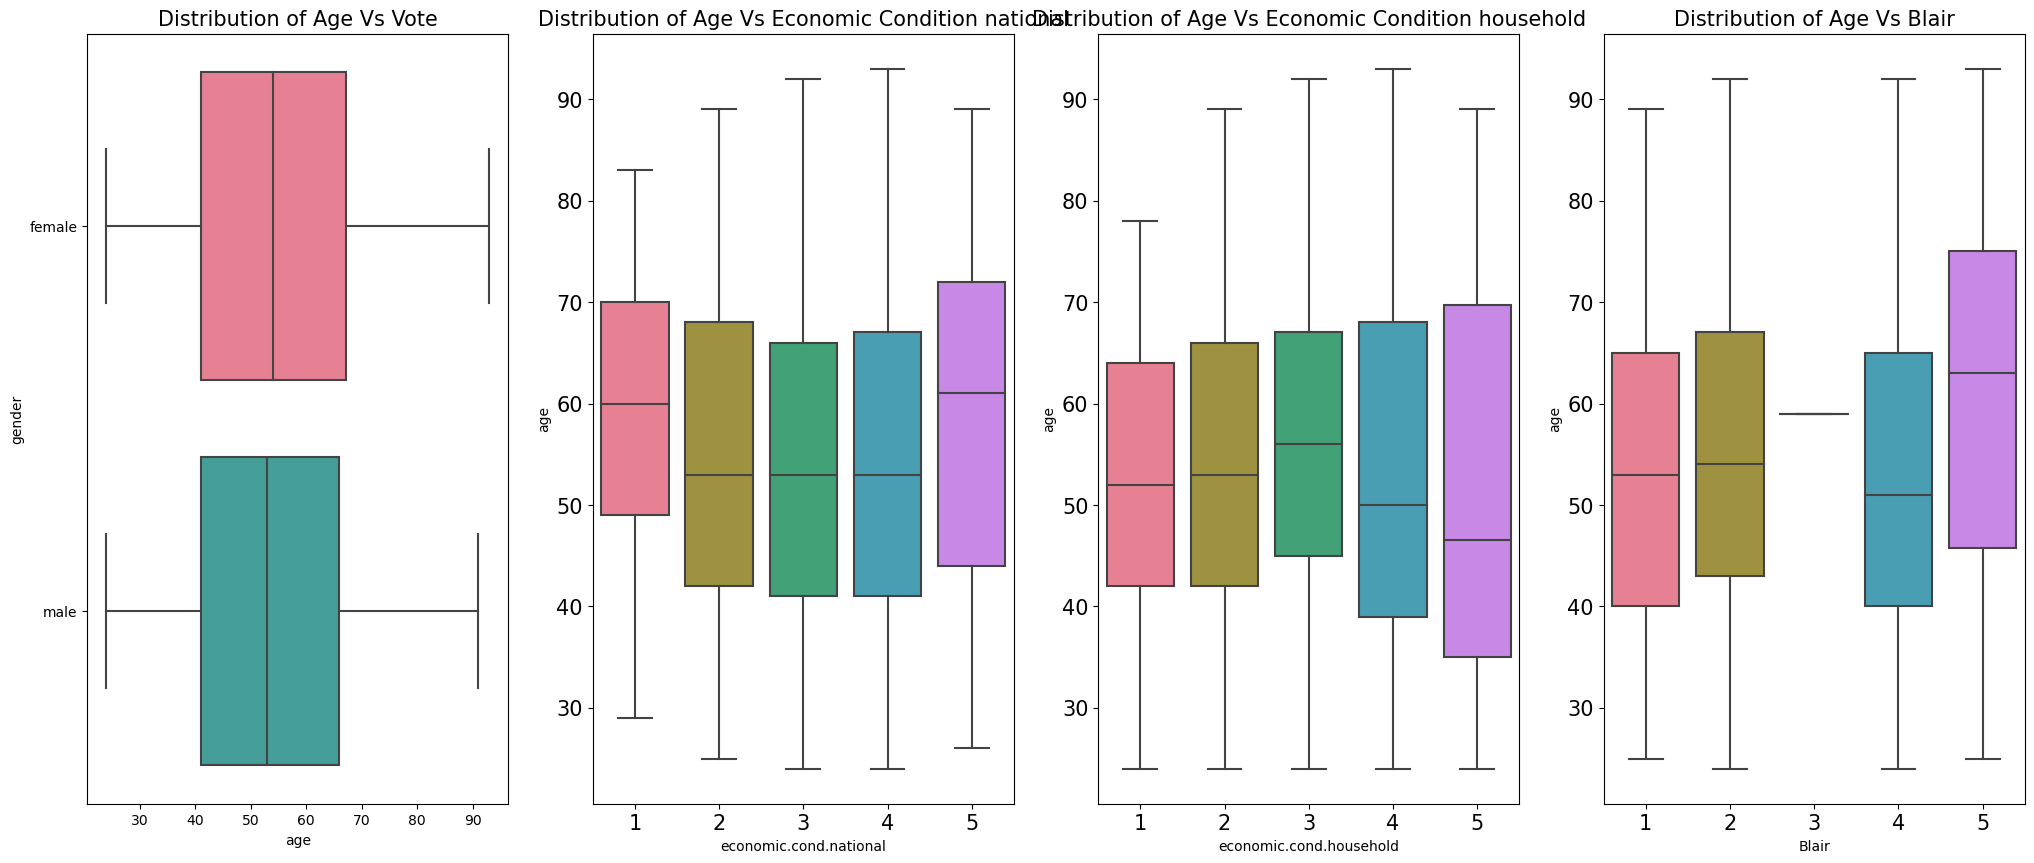

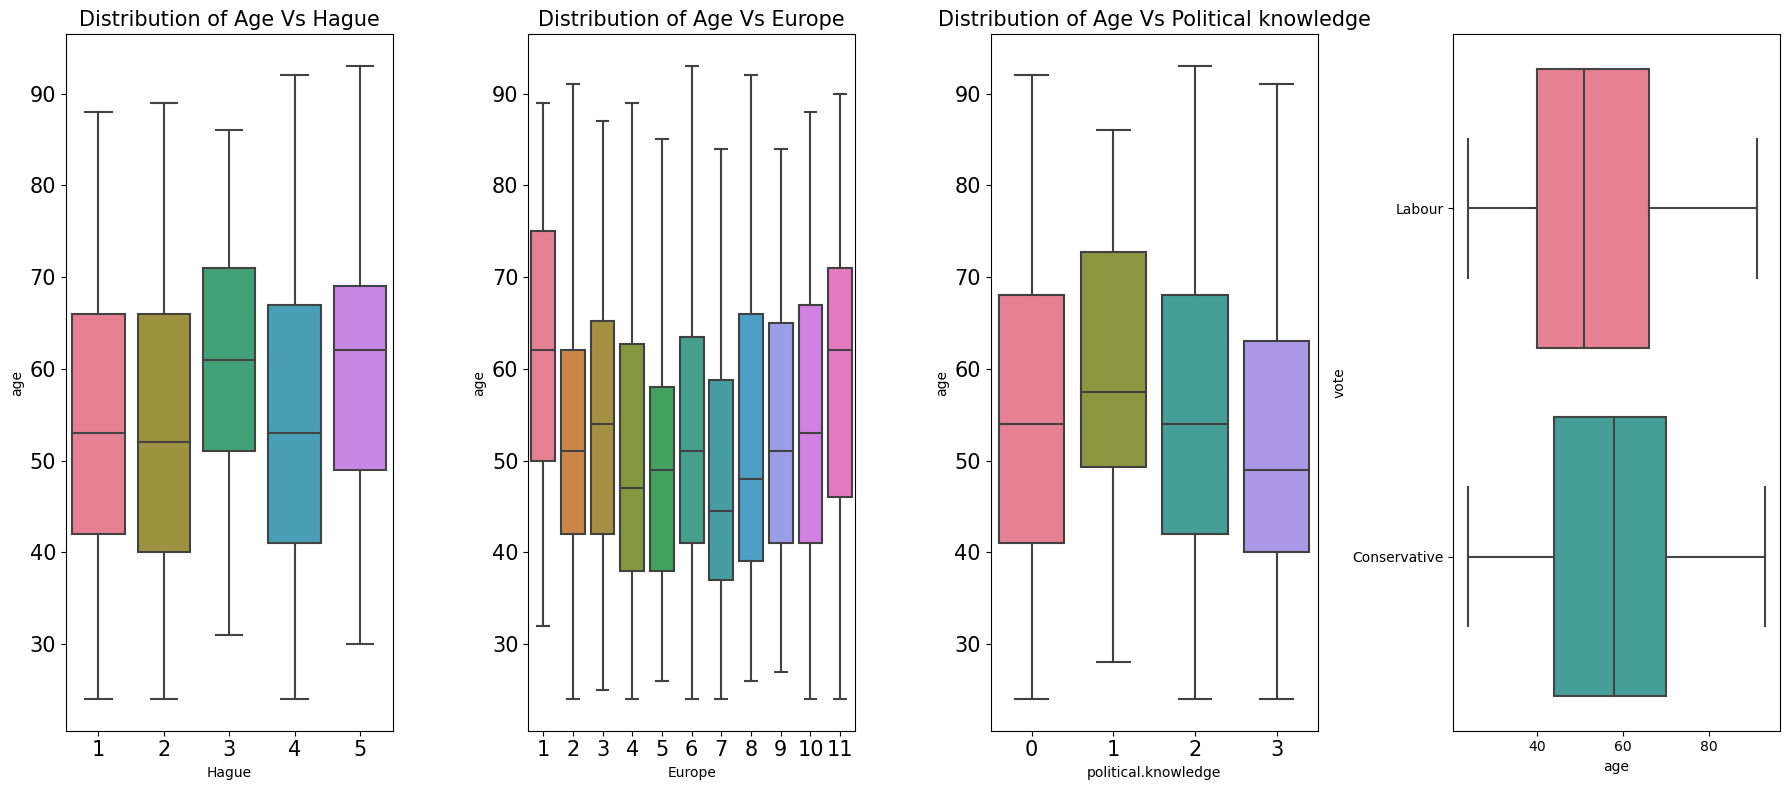

In [179]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(25,10))
fig, (ax5,ax6,ax7,ax8)=plt.subplots(1,4,figsize=(18,8))
sns.boxplot(data=df,x='age',y='gender',palette='husl',ax=ax1)
ax1.set_title('Distribution of Age Vs Gender', fontsize=15)

sns.boxplot(data=df,y='age',x='economic.cond.national',palette='husl',ax=ax2)
ax2.set_title('Distribution of Age Vs Economic Condition national', fontsize=15)
ax2.tick_params(labelsize=15)

sns.boxplot(data=df,y='age',x='economic.cond.household',palette='husl',ax=ax3)
ax3.set_title('Distribution of Age Vs Economic Condition household', fontsize=15)
ax3.tick_params(labelsize=15)
sns.boxplot(data=df,y='age',x='Blair',palette='husl',ax=ax4)
ax4.set_title('Distribution of Age Vs Blair', fontsize=15)
ax4.tick_params(labelsize=15)
sns.boxplot(data=df,y='age',x='Hague',palette='husl',ax=ax5)
ax5.set_title('Distribution of Age Vs Hague', fontsize=15)
ax5.tick_params(labelsize=15)
sns.boxplot(data=df,y='age',x='Europe',palette='husl',ax=ax6)
ax6.set_title('Distribution of Age Vs Europe', fontsize=15)
ax6.tick_params(labelsize=15)
sns.boxplot(data=df,y='age',x='political.knowledge',palette='husl',ax=ax7)
ax7.set_title('Distribution of Age Vs Political knowledge', fontsize=15)
ax7.tick_params(labelsize=15)
sns.boxplot(data=df,x='age',y='vote',palette='husl',ax=ax8)
ax1.set_title('Distribution of Age Vs Vote', fontsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<AxesSubplot:xlabel='age_cat', ylabel='count'>

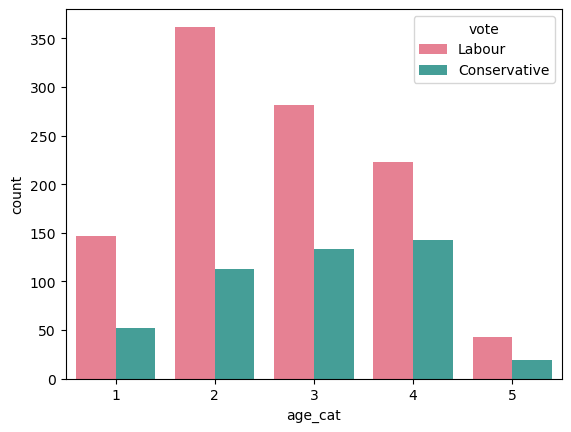

In [184]:
sns.countplot(data=df,x='age_cat',hue='vote',palette='husl')

<AxesSubplot:xlabel='vote,age_cat'>

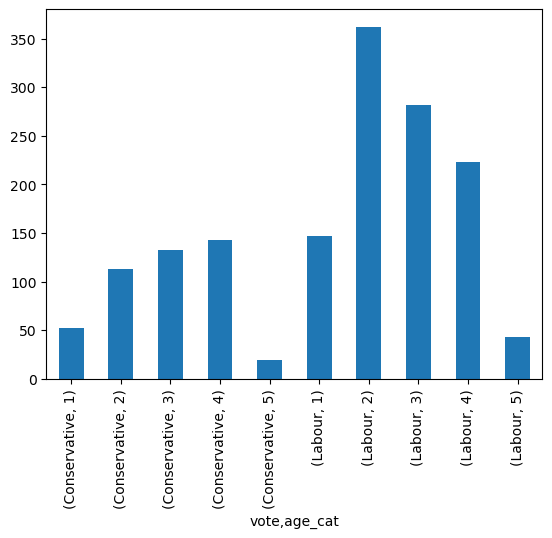

In [200]:
df.groupby(['vote','age_cat'])['age_cat'].count().plot(kind='bar')

<AxesSubplot:xlabel='vote,political.knowledge'>

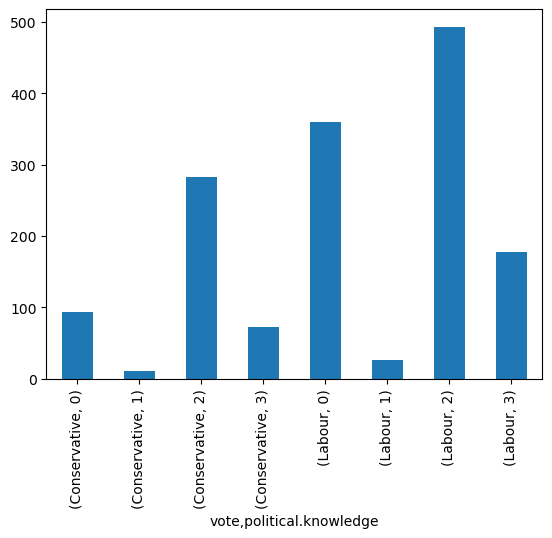

In [202]:
df.groupby(['vote','political.knowledge'])['political.knowledge'].count().plot(kind='bar')

<AxesSubplot:xlabel='vote,economic.cond.national'>

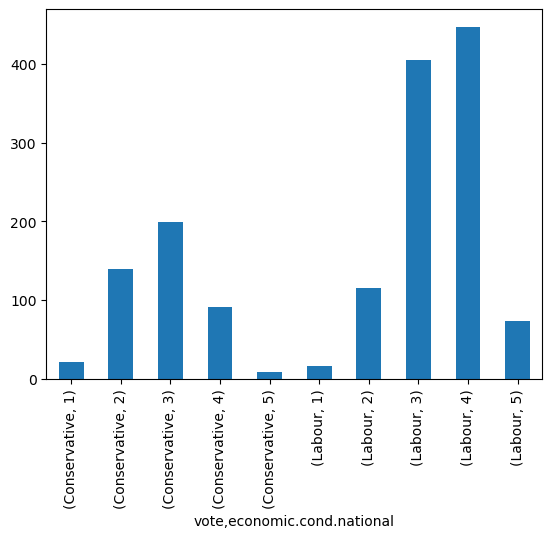

In [203]:
df.groupby(['vote','economic.cond.national'])['economic.cond.national'].count().plot(kind='bar')

In [191]:
df.groupby(['vote','gender'])['gender'].count()

vote          gender
Conservative  female    257
              male      203
Labour        female    551
              male      506
Name: gender, dtype: int64

In [ ]:
df.groupby(['vote','gender'])['gender'].count()

In [ ]:
df ['age_cat'] = pd.cut (df ['age'], bins= [0,35,50,65,80,100], labels= ['1', '2', '3','4','5'])

## Multivariate Analysis

<Figure size 1500x800 with 0 Axes>

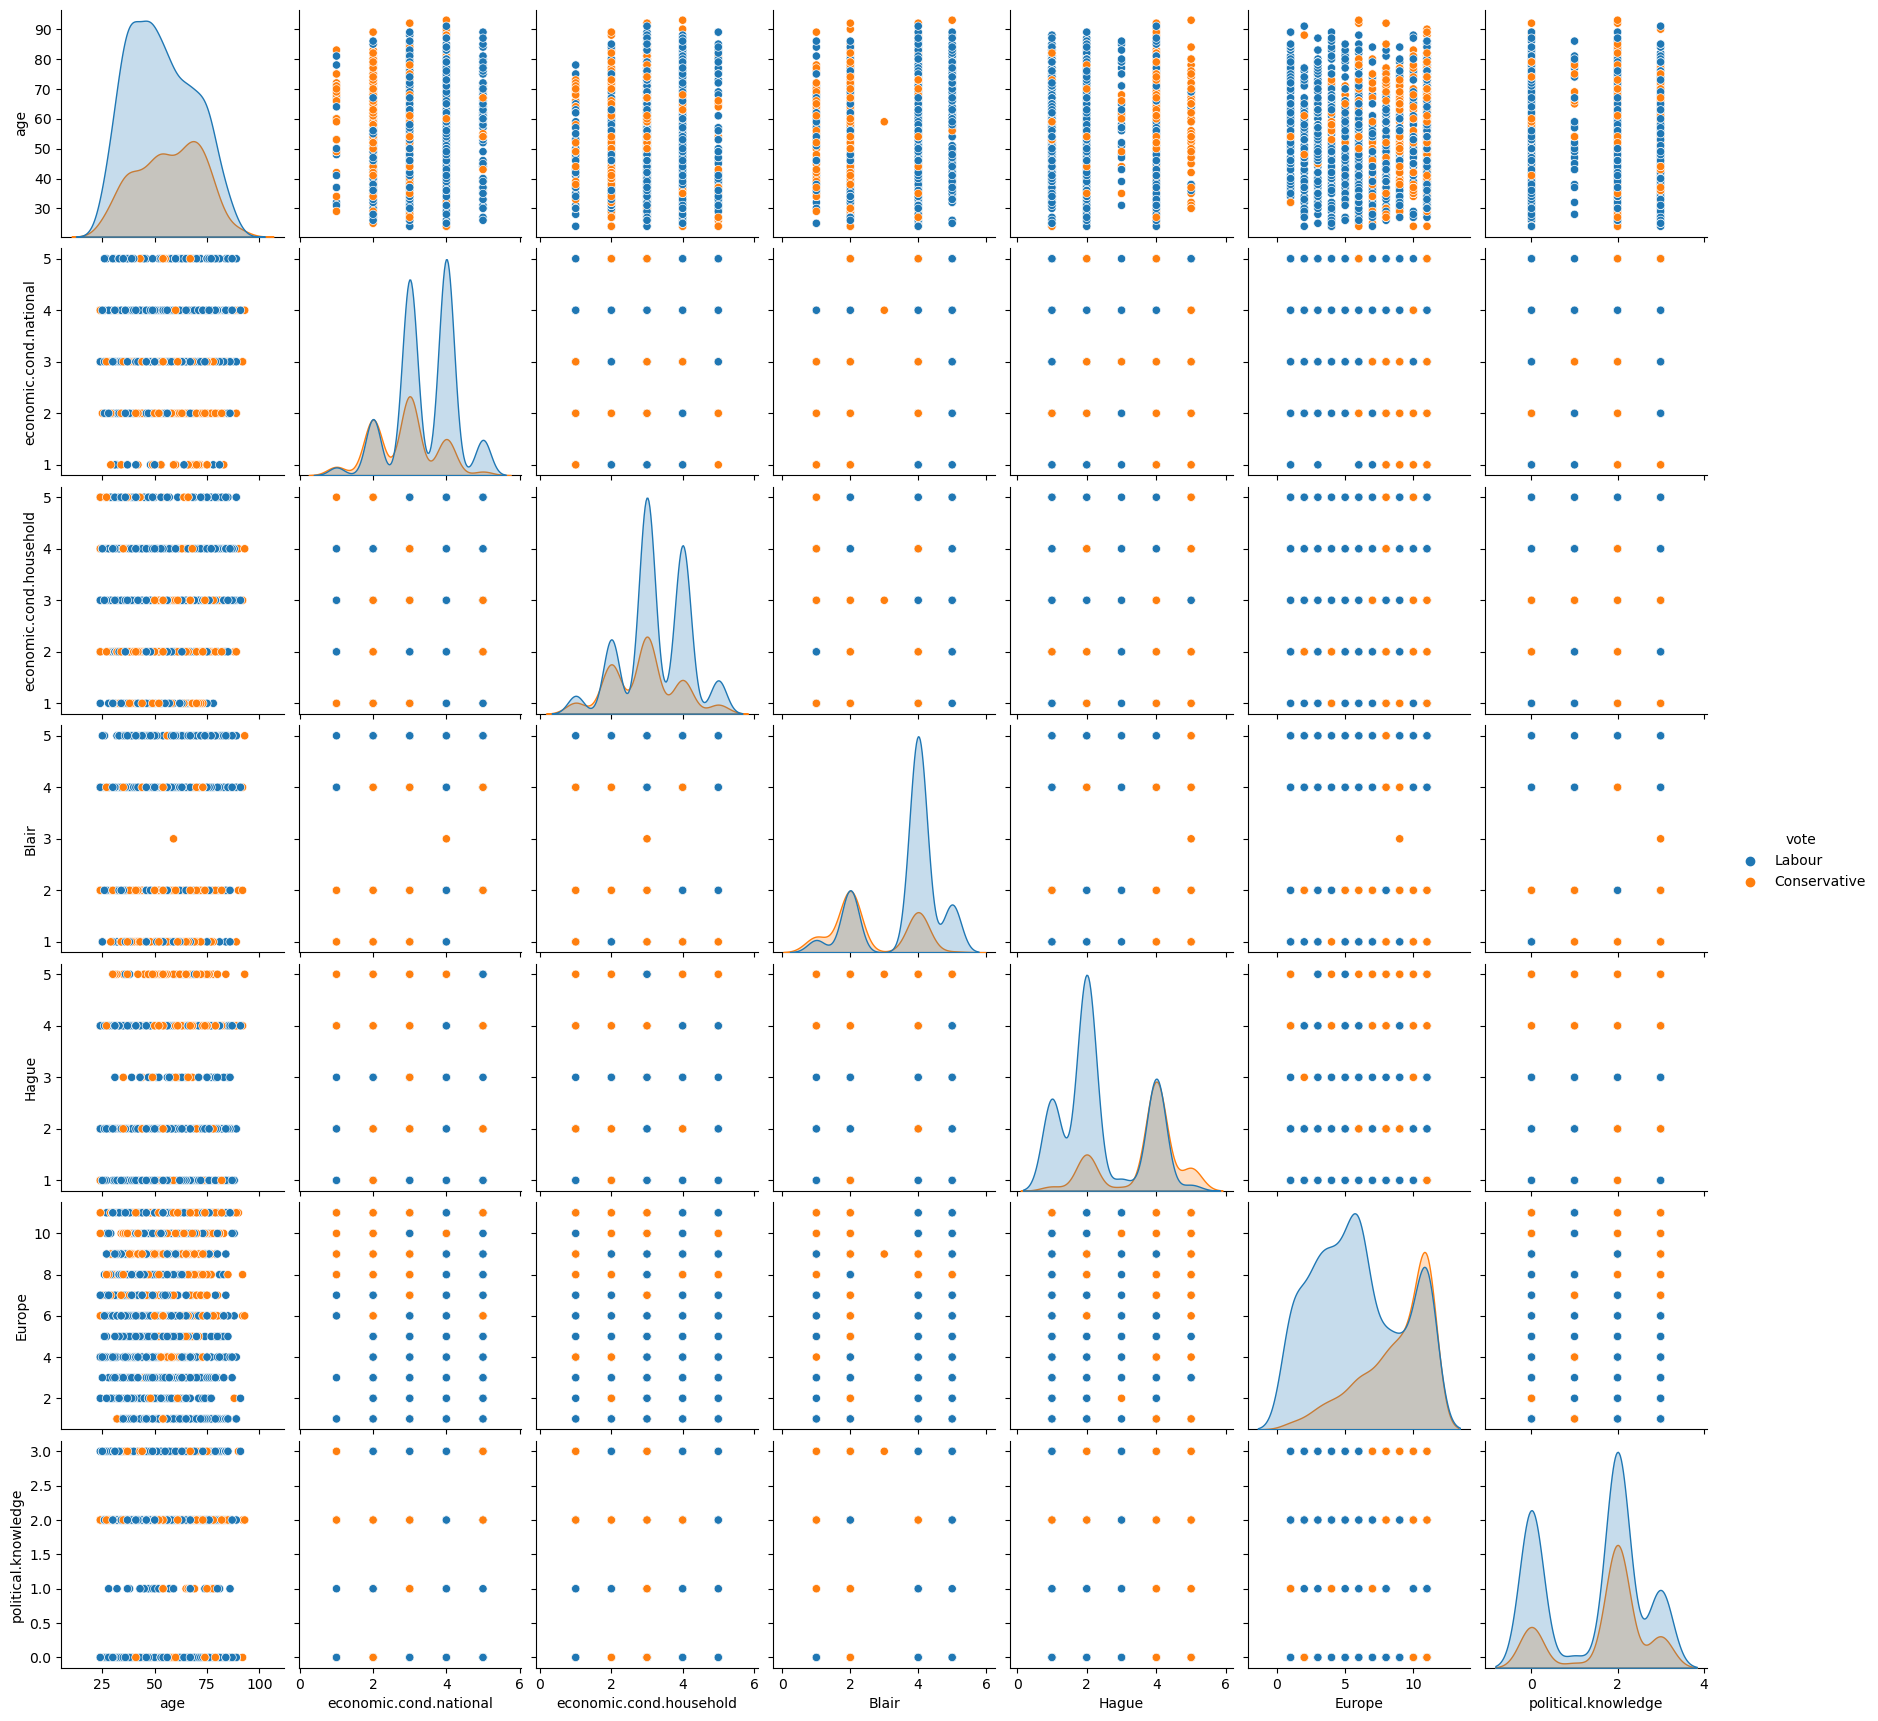

In [220]:
plt.figure(figsize=(15,8))
sns.pairplot(df,hue='vote')

In [11]:
df.drop("age" , axis = 1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   object
 2   economic.cond.household  1517 non-null   object
 3   Blair                    1517 non-null   object
 4   Hague                    1517 non-null   object
 5   Europe                   1517 non-null   object
 6   political.knowledge      1517 non-null   object
 7   gender                   1517 non-null   object
 8   age_cat                  1517 non-null   object
dtypes: object(9)
memory usage: 106.8+ KB


### Data Encoding

In [15]:
df['economic.cond.national']=df['economic.cond.national'].astype('int')
df['economic.cond.household']=df['economic.cond.household'].astype('int')
df['Blair']=df['Blair'].astype('int')
df['Hague']=df['Hague'].astype('int')
df['Europe']=df['Europe'].astype('int')
df['political.knowledge']=df['political.knowledge'].astype('int')
df['age_cat']=df['age_cat'].astype('int')


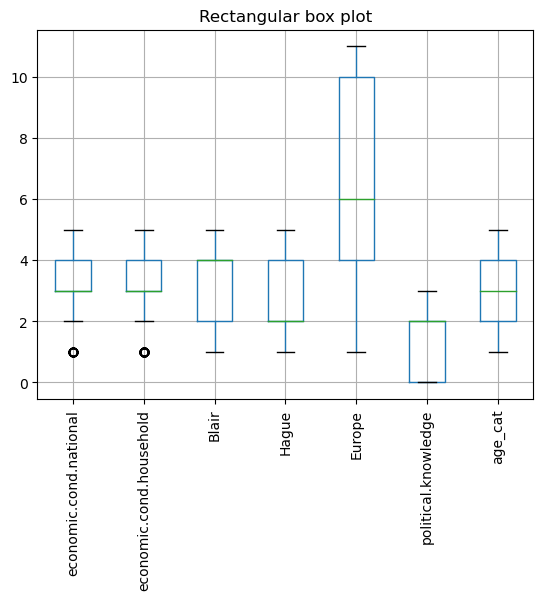

In [35]:
df[['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','age_cat']].boxplot()
plt.title('Rectangular box plot')
plt.xticks(rotation = 90)
plt.show();

In [13]:
df=pd.get_dummies(df, columns=['vote','gender'],drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   economic.cond.national   1517 non-null   int32
 1   economic.cond.household  1517 non-null   int32
 2   Blair                    1517 non-null   int32
 3   Hague                    1517 non-null   int32
 4   Europe                   1517 non-null   int32
 5   political.knowledge      1517 non-null   int32
 6   age_cat                  1517 non-null   int32
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int32(7), uint8(2)
memory usage: 44.6 KB


In [17]:
df.head()

economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0                       3                        3      4      1       2   
1                       4                        4      4      4       5   
2                       4                        4      5      2       3   
3                       4                        2      2      1       4   
4                       2                        2      1      1       6   

   political.knowledge  age_cat  vote_Labour  gender_male  
0                    2        2            1            0  
1                    2        2            1            1  
2                    2        1            1            1  
3                    0        1            1            0  
4                    2        2            1            1

In [18]:
X=df.drop('vote_Labour',axis=1)
y=df['vote_Labour']


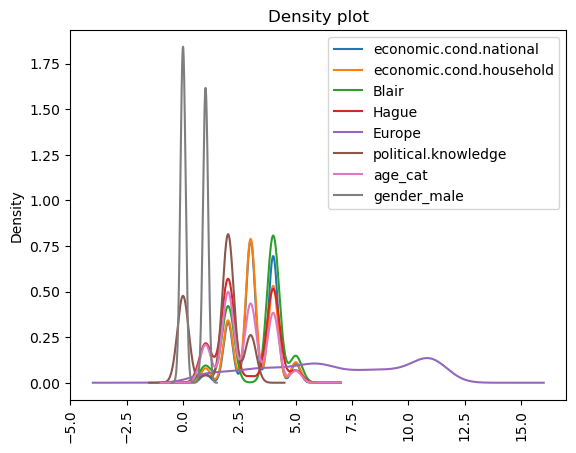

In [19]:
X.plot(kind='kde')
plt.title('Density plot')
plt.xticks(rotation = 90)
plt.show();

In [20]:
X.head()


economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0                       3                        3      4      1       2   
1                       4                        4      4      4       5   
2                       4                        4      5      2       3   
3                       4                        2      2      1       4   
4                       2                        2      1      1       6   

   political.knowledge  age_cat  gender_male  
0                    2        2            0  
1                    2        2            1  
2                    2        1            1  
3                    0        1            0  
4                    2        2            1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
print("Number of rows in training dataset is", X_train.shape[0] ,"and number of columns in training dataset is" , X_train.shape[1])
print("Number of rows in testing dataset is", X_test.shape[0] ,"and number of columns in testing dataset is" , X_test.shape[1])

Number of rows in training dataset is 1061 and number of columns in training dataset is 8
Number of rows in testing dataset is 456 and number of columns in testing dataset is 8


In [23]:
print("Number of rows in target variable in training dataset is", y_train.shape[0])
print("Number of rows in target variable in testing dataset is", y_test.shape[0])

Number of rows in target variable in training dataset is 1061
Number of rows in target variable in testing dataset is 456


In [24]:
X_train.head()

economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
987                        2                        4      1      4      11   
1267                       4                        3      4      4       6   
647                        4                        3      4      4       7   
675                        3                        3      4      2      11   
537                        5                        3      4      2       8   

      political.knowledge  age_cat  gender_male  
987                     2        1            0  
1267                    0        2            1  
647                     2        3            0  
675                     0        2            1  
537                     0        2            1

In [25]:
pd.DataFrame(y_train.head())

vote_Labour
987             0
1267            1
647             0
675             1
537             1

In [26]:
X_test.head()

economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
503                        3                        3      2      2       8   
368                        3                        2      4      2       8   
1071                       5                        5      5      2       1   
1027                       2                        3      2      4       8   
1322                       5                        4      4      4       8   

      political.knowledge  age_cat  gender_male  
503                     2        4            0  
368                     3        2            1  
1071                    2        5            1  
1027                    2        2            0  
1322                    0        1            1

In [27]:
pd.DataFrame(y_test.head())

vote_Labour
503             1
368             1
1071            1
1027            0
1322            1

### LDA

In [28]:
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456

Accuracy Score for Test data is  0.84


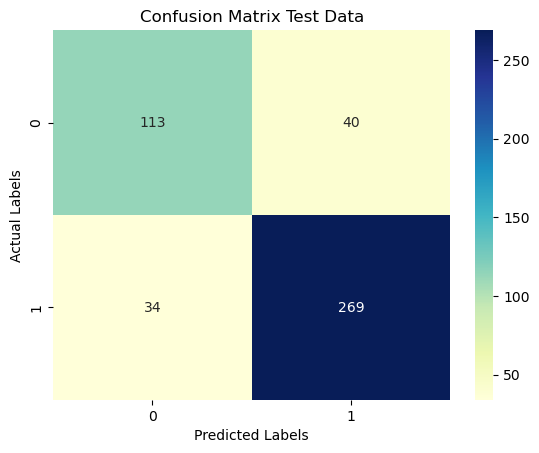

In [29]:
y_predict = LDA_model.predict(X_test)
print(classification_report(y_test, y_predict))
print("Accuracy Score for Test data is ", round(LDA_model.score(X_test, y_test),2))
sns.heatmap((metrics.confusion_matrix(y_test,y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()


              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Accuracy Score for Train data is  0.83


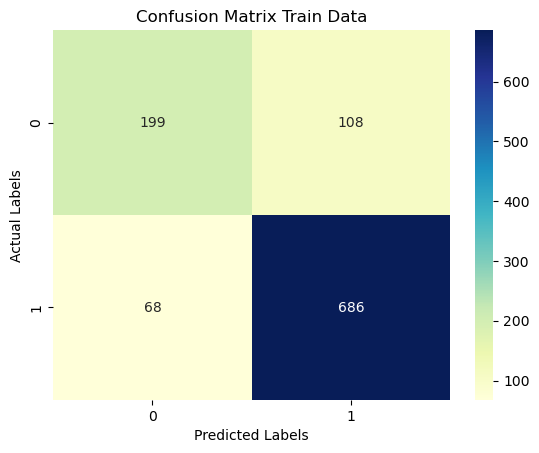

In [30]:
y_predict_train = LDA_model.predict(X_train)
print(classification_report(y_train, y_predict_train))
print("Accuracy Score for Train data is ", round(LDA_model.score(X_train, y_train),2))
sns.heatmap((metrics.confusion_matrix(y_train,y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


In [31]:
LDA_model.coef_

array([[ 0.60530578,  0.05102988,  0.73923521, -0.92339006, -0.22308201,
        -0.43162628, -0.27158949,  0.14763932]])

In [32]:
X.columns

Index(['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague',
       'Europe', 'political.knowledge', 'age_cat', 'gender_male'],
      dtype='object')

In [36]:
LDA_model.intercept_

array([2.28316275])

In [37]:
DS=[]
intercept=2.28316275
coef= [0.60530578,  0.05102988,  0.73923521, -0.92339006, -0.22308201,
        -0.43162628, -0.27158949,  0.14763932]# Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3=s3+(X.iloc[p,q]*coef[q]) # Building the LDF equation 
    s3=s3+intercept
    DS.append(s3)

In [38]:
'''
Classification Rule :

if LDF>=0 then Classify as 1 
else if LDF <0 then Classify as 0 
'''


s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ",X.iloc[i,:])
        print()
        print("-->","{ DS: ",DS[i],">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ",X.iloc[i,:])
        print()
        print("-->","{ DS: ",DS[i],"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1


FOR Row: 0   economic.cond.national     3
economic.cond.household    3
Blair                      4
Hague                      1
Europe                     2
political.knowledge        2
age_cat                    2
gender_male                0
Name: 0, dtype: int32

--> { DS:  4.43312495 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1   economic.cond.national     4
economic.cond.household    4
Blair                      4
Hague                      4
Europe                     5
political.knowledge        2
age_cat                    2
gender_male                1
Name: 1, dtype: int32

--> { DS:  1.79768372 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2   economic.cond.national     4
economic.cond.household    4
Blair                      5
Hague                      2
Europe                     3
political.knowledge        2
age_cat  

In [39]:
print(s1," rows classified as 1 (Not Default) ")
print(s2," rows classified as 0 (Default) ")

1103  rows classified as 1 (Not Default) 
414  rows classified as 0 (Default) 


In [40]:
pred_prob=LDA_model.predict_proba(X)#Posterior Probability for each row

In [41]:
pred_prob[:,1]

array([0.9882621 , 0.85786674, 0.99394894, ..., 0.92756205, 0.06377831,
       0.10827477])

In [42]:
'''
Classification Rule :

if prob(Y=1|X) >=0 then Classify as 1 
else ifprob(Y=1|X) <0 then Classify as 0 
'''


s3,s4=0,0
for i in range(len(pred_prob[:,1])):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ",X.iloc[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ",X.iloc[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

  

FOR Row: 0   economic.cond.national     3
economic.cond.household    3
Blair                      4
Hague                      1
Europe                     2
political.knowledge        2
age_cat                    2
gender_male                0
Name: 0, dtype: int32

--> { prob(Y=1|X) = 0.9882620992395093 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1   economic.cond.national     4
economic.cond.household    4
Blair                      4
Hague                      4
Europe                     5
political.knowledge        2
age_cat                    2
gender_male                1
Name: 1, dtype: int32

--> { prob(Y=1|X) = 0.857866743365971 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 2   economic.cond.national     4
economic.cond.household    4
Blair                      5
Hague                      2
Europe                     3

In [43]:
print(s3," rows classified as 1 (Not Default) ")
print(s4," rows classified as 0 (Default) ")

1103  rows classified as 1 (Not Default) 
414  rows classified as 0 (Default) 


AUC for Training Data: 0.889


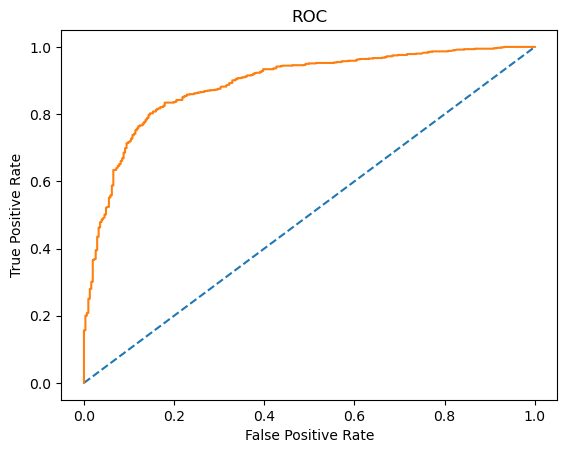

In [44]:
# predict probabilities
probs_tr = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_tr = probs_tr[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs_tr)

print('AUC for Training Data: %.3f' % (train_auc))
# calculate roc curve
test_fpr_tr, test_tpr_tr, test_thresholds_tr = roc_curve(y_train, probs_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(test_fpr_tr, test_tpr_tr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


AUC for Test Data: 0.887


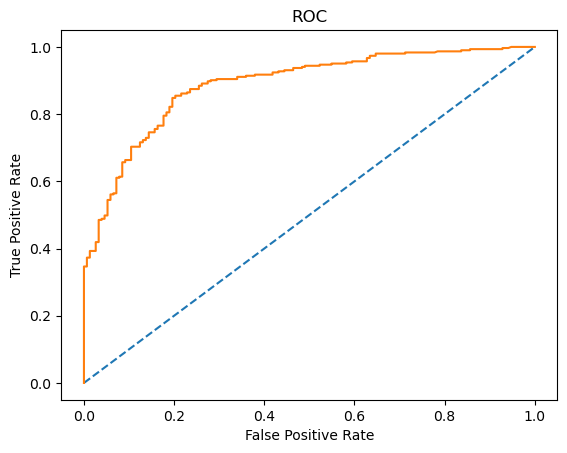

In [45]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)

print('AUC for Test Data: %.3f' %(test_auc))
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### LDA Grid search CV

In [46]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [47]:
model_LDA = LinearDiscriminantAnalysis()

In [48]:
grid_search = GridSearchCV(estimator = model_LDA, param_grid = grid)

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [50]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [51]:
best_model_LDA = grid_search.best_estimator_

In [52]:
ytrain_predict = best_model_LDA.predict(X_train)
ytest_predict = best_model_LDA.predict(X_test)

In [53]:
ytest_predict_prob=best_model_LDA.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


0         1
0  0.462671  0.537329
1  0.137498  0.862502
2  0.005955  0.994045
3  0.853124  0.146876
4  0.053729  0.946271

In [54]:
model_score_test = best_model_LDA.score(X_test, y_test)
print(model_score_test);
print(metrics.confusion_matrix(y_test, ytest_predict));
print(metrics.classification_report(y_test, ytest_predict));

0.8377192982456141
[[113  40]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



In [55]:
model_score_train = best_model_LDA.score(X_train, y_train)
print(model_score_train);
print(metrics.confusion_matrix(y_train, ytrain_predict));
print(metrics.classification_report(y_train, ytrain_predict));


0.8341187558906692
[[199 108]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Accuracy Score for Train data is  0.83


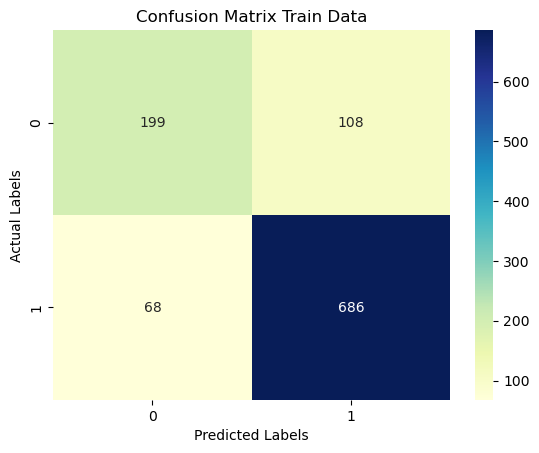

In [56]:
y_predict_train = best_model_LDA.predict(X_train)
print(classification_report(y_train, y_predict_train))
print("Accuracy Score for Train data is ", round(best_model_LDA.score(X_train, y_train),2))
sns.heatmap((metrics.confusion_matrix(y_train,y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456

Accuracy Score for Test data is  0.84


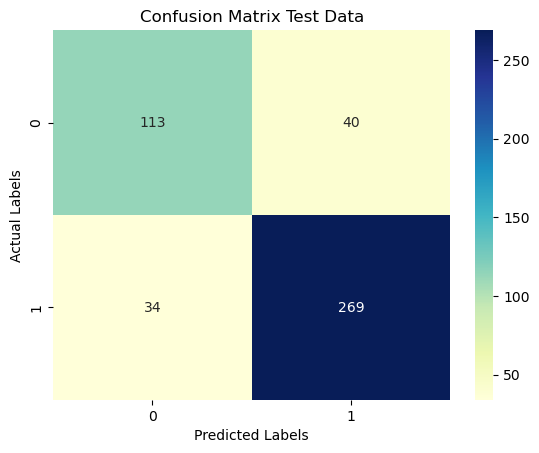

In [58]:
y_predict = best_model_LDA.predict(X_test)
print(classification_report(y_test, y_predict))
print("Accuracy Score for Test data is ", round(best_model_LDA.score(X_test, y_test),2))
sns.heatmap((metrics.confusion_matrix(y_test,y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC for Training Data: 0.889


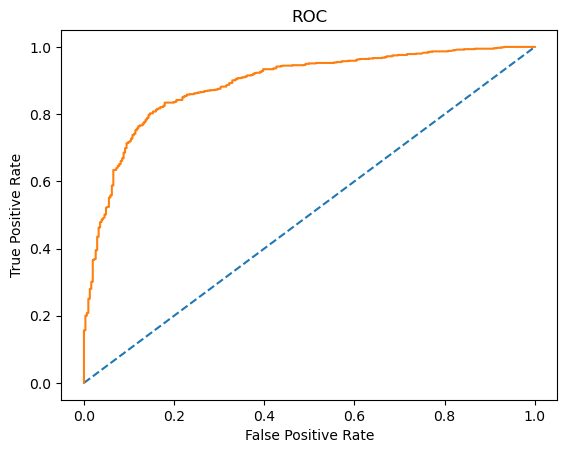

In [57]:
# predict probabilities
probs_tr = best_model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_tr = probs_tr[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs_tr)

print('AUC for Training Data: %.3f' % (train_auc))
# calculate roc curve
test_fpr_tr, test_tpr_tr, test_thresholds_tr = roc_curve(y_train, probs_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(test_fpr_tr, test_tpr_tr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


AUC for Test Data: 0.887


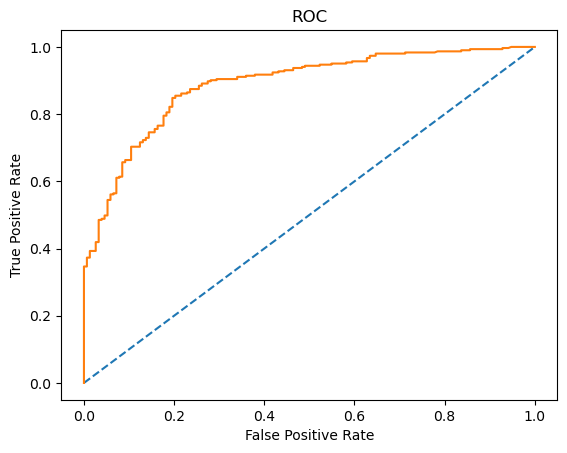

In [59]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)

print('AUC for Test Data: %.3f' %(test_auc))
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [60]:

print("The LDA Model Score Post Tuning on train data set is %.3f " % model_score_train)
print("The LDA Model Score Post Tuning on test data set is %.3f " % model_score_test)



The LDA Model Score Post Tuning on train data set is 0.834 
The LDA Model Score Post Tuning on test data set is 0.838 


<AxesSubplot:ylabel='features'>

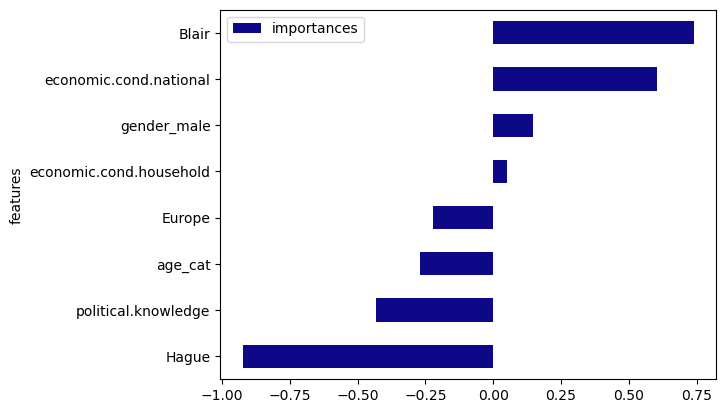

In [169]:
feat=pd.DataFrame({'features':X_train.columns,'importances':best_model_LDA.coef_[0]})
feat.sort_values('importances',inplace=True)
feat.plot(kind='barh',y='importances',x='features',colormap='plasma')

## Logistic Regession

In [61]:
model_lr= LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',verbose=True ,random_state=1)
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)
model_score_lr = model_lr.score(X_test, y_test)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


In [62]:
print(model_score_lr);
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));


0.831140350877193
[[112  41]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



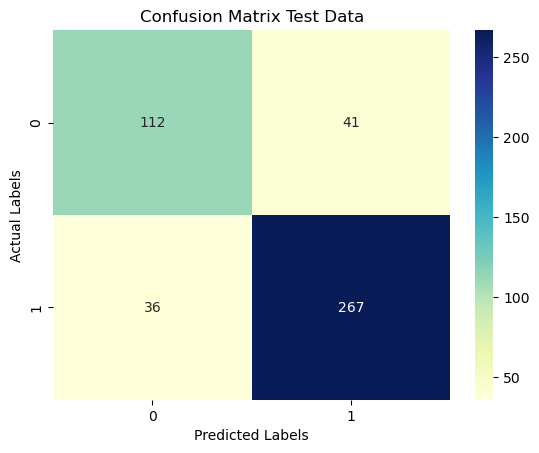

In [63]:
sns.heatmap((metrics.confusion_matrix(y_test,y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

In [64]:
y_predict_train = model_lr.predict(X_train)
model_score_train_lr = model_lr.score(X_train, y_train)
print(model_score_train_lr)
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))

0.8322337417530632
[[196 111]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



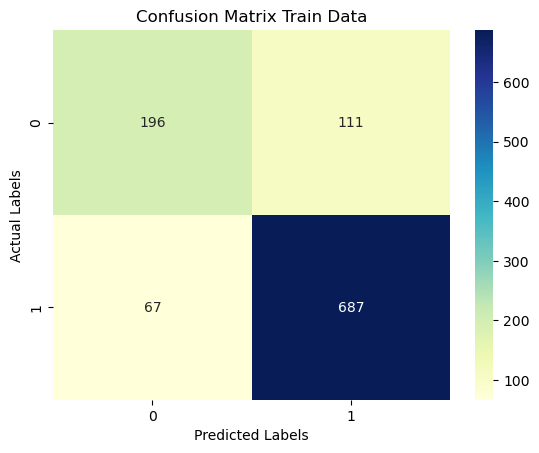

In [65]:
sns.heatmap((metrics.confusion_matrix(y_train,y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

AUC: 0.890


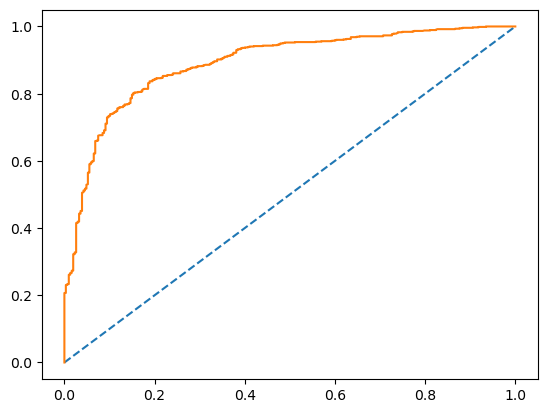

In [66]:
# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.882


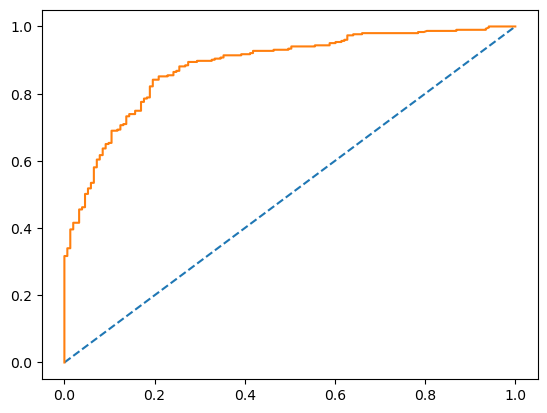

In [67]:
# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Logistic Regression Grid search CV

In [68]:
grid={'penalty':['l1','l2','none'],
      'solver':['sag','lbfgs','newton-cg','liblinear','saga'],
      'tol':[0.0001,0.00001],
     'max_iter':[1000,10000,100000],
          }

In [70]:
model = LogisticRegression()

In [71]:
grid_search = GridSearchCV(estimator = model, param_grid = grid)

In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'liblinear',
                                    'saga'],
                         'tol': [0.0001, 1e-05]})

In [73]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')


In [74]:
best_model_lr = grid_search.best_estimator_

In [75]:
ytrain_predict = best_model_lr.predict(X_train)
ytest_predict = best_model_lr.predict(X_test)

In [76]:
model_score_test = best_model_lr.score(X_test, y_test)
print(model_score_test);
print(metrics.confusion_matrix(y_test, ytest_predict));
print(metrics.classification_report(y_test, ytest_predict));

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



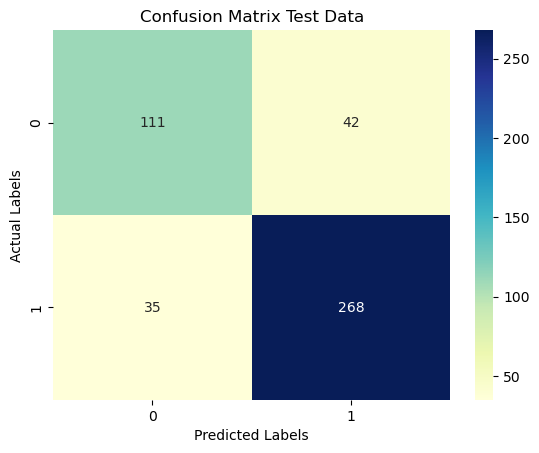

In [77]:
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

In [78]:
model_score_train = best_model_lr.score(X_train, y_train)
print(model_score_train);
print(metrics.confusion_matrix(y_train, ytrain_predict));
print(metrics.classification_report(y_train, ytrain_predict));

0.8350612629594723
[[196 111]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



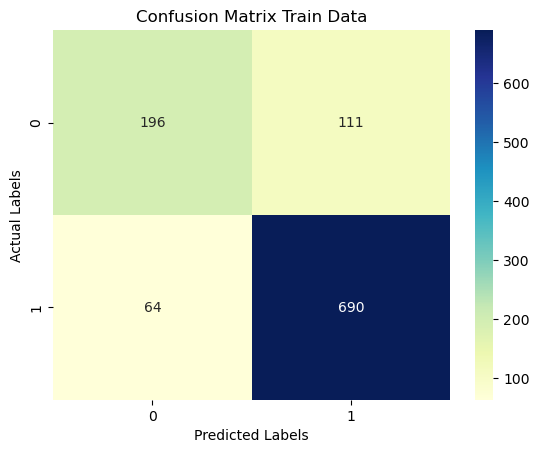

In [79]:
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

AUC: 0.890


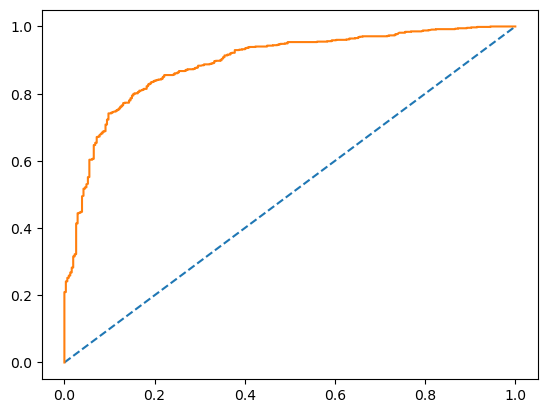

In [80]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.880


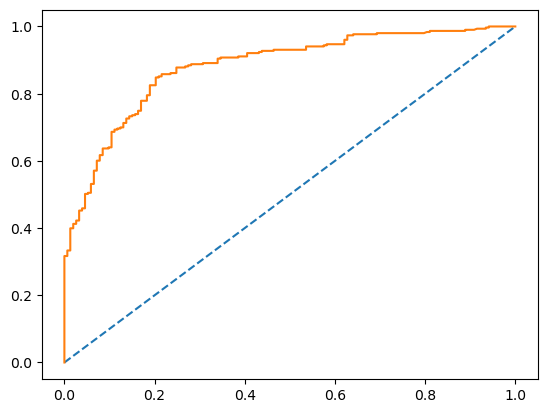

In [81]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [82]:
print("The Logistic Regression Model Score Post Tuning on train data set is %.3f " % model_score_train)
print("The Logistic Regression Model Score Post Tuning on test data set is %.3f " % model_score_test)

The Logistic Regression Model Score Post Tuning on train data set is 0.835 
The Logistic Regression Model Score Post Tuning on test data set is 0.831 


In [83]:
best_model_lr.coef_

array([[ 0.65386875,  0.07722447,  0.6098326 , -0.80222886, -0.20487432,
        -0.30260887, -0.17128257,  0.17672612]])

<AxesSubplot:ylabel='features'>

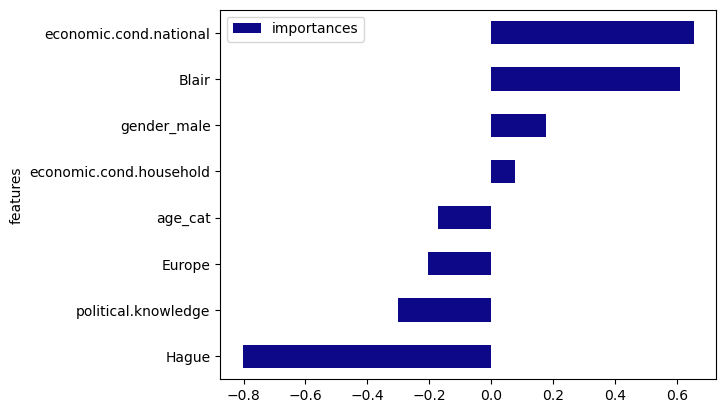

In [84]:

feat=pd.DataFrame({'features':X_train.columns,'importances':best_model_lr.coef_[0]})
feat.sort_values('importances',inplace=True)
feat.plot(kind='barh',y='importances',x='features',colormap='plasma')

## Gaussian NB

In [85]:

model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

model_GNB_score_test = model_GNB.score(X_test, y_test)
y_predict_test_GNB = model_GNB.predict(X_test)

# summarize the fit of the model

print(model_GNB_score_test)
print(metrics.classification_report(y_test, y_predict_test_GNB))
print(metrics.confusion_matrix(y_test, y_predict_test_GNB))


0.8223684210526315
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

[[111  42]
 [ 39 264]]


In [86]:
model_GNB_score_train = model_GNB.score(X_train, y_train)
y_predict_train_GNB = model_GNB.predict(X_train)

# summarize the fit of the model
print(model_GNB_score_train)
print(metrics.classification_report(y_train, y_predict_train_GNB))
print(metrics.confusion_matrix(y_train, y_predict_train_GNB))


0.8331762488218661
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061

[[211  96]
 [ 81 673]]


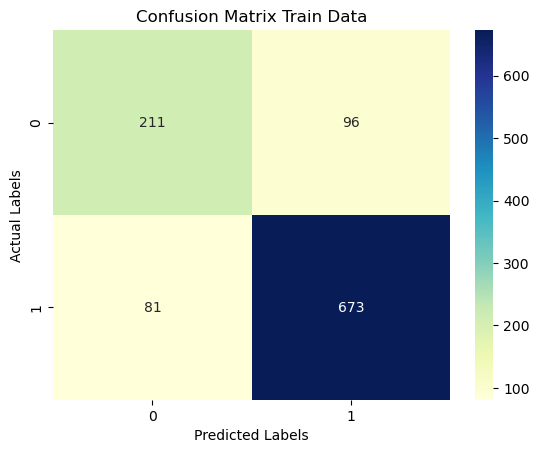

In [88]:
sns.heatmap((metrics.confusion_matrix(y_train,y_predict_train_GNB)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

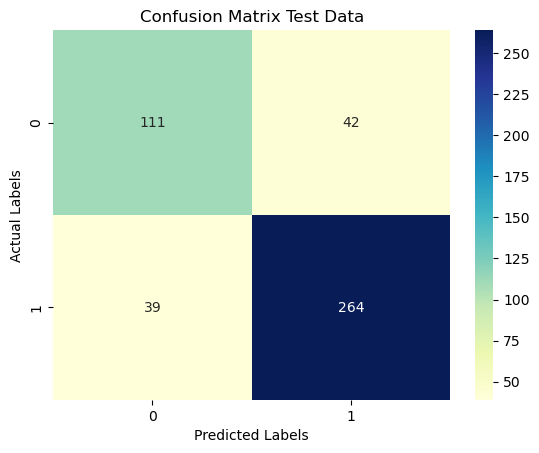

In [89]:
sns.heatmap((metrics.confusion_matrix(y_test,y_predict_test_GNB)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.888


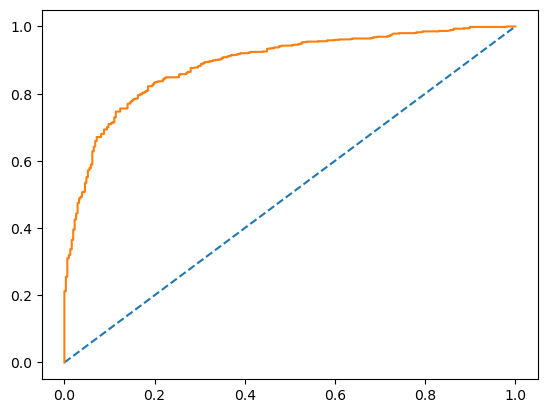

In [90]:
# predict probabilities
probs = model_GNB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.877


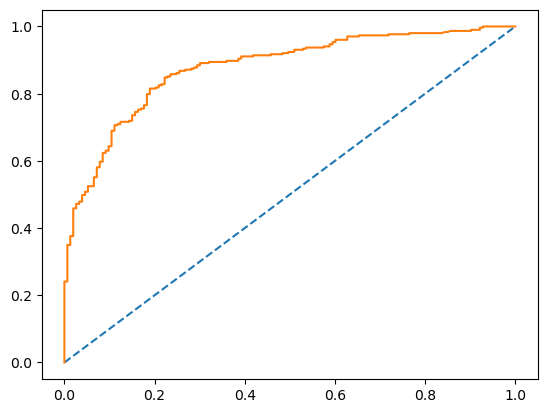

In [91]:
# predict probabilities
probs = model_GNB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Naive Bayes with SMOTE

In [92]:
from imblearn.over_sampling import SMOTE
#SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [93]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)


GaussianNB()

In [94]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(unique, counts)

[0 1] [754 754]


In [95]:
y_train_predict = NB_SM_model.predict(X_train_res)
SMOTE_model_score_train = NB_SM_model.score(X_train_res, y_train_res)
print("The SMOTE Model Score for train data set is %.3f " % SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))


The SMOTE Model Score for train data set is 0.828 
[[625 129]
 [131 623]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       754
           1       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



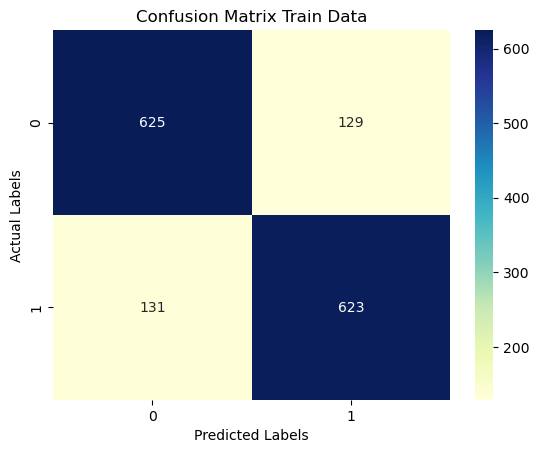

In [96]:
sns.heatmap((metrics.confusion_matrix(y_train_res,y_train_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


In [97]:
y_test_predict = NB_SM_model.predict(X_test)
SMOTE_model_score_test = NB_SM_model.score(X_test, y_test)
print("The SMOTE Model Score for test data set is %.3f " % SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


The SMOTE Model Score for test data set is 0.803 
[[121  32]
 [ 58 245]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       153
           1       0.88      0.81      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



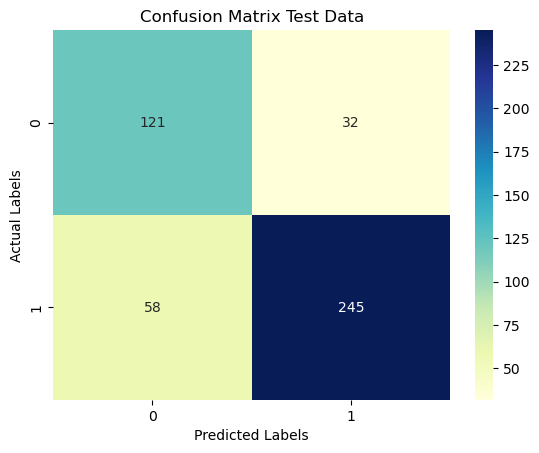

In [98]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.882


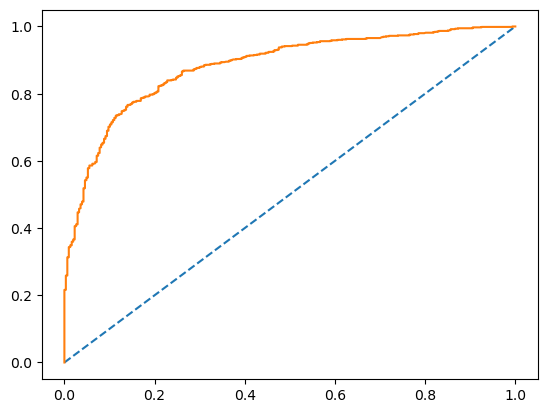

In [99]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.862


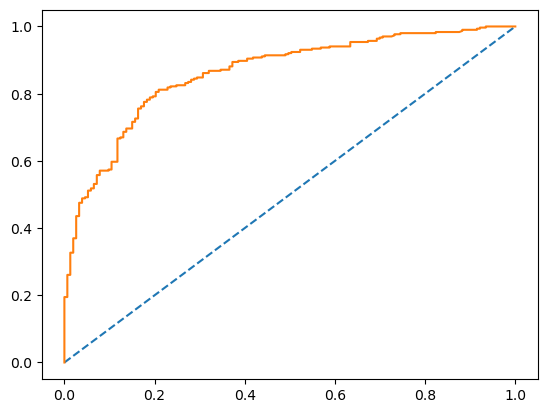

In [100]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [101]:
print("The Naive Bayes Model Score Post Tuning on train data is %.3f  " % SMOTE_model_score_train)
print("The Naive Bayes Model Score Post Tuning on test data is %.3f  " % SMOTE_model_score_test)

The Naive Bayes Model Score Post Tuning on train data is 0.828  
The Naive Bayes Model Score Post Tuning on test data is 0.803  


## KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)
y_train_predict = KNN_model.predict(X_train)
print(metrics.confusion_matrix(y_test, y_test_predict));
print(metrics.classification_report(y_test, y_test_predict));
print(metrics.confusion_matrix(y_train, y_train_predict));
print(metrics.classification_report(y_train, y_train_predict));
print("Accuracy Score for  Test Data is  ", round(KNN_model.score(X_test, y_test),2));
print("Accuracy Score for Train data is  ", round(KNN_model.score(X_train, y_train),2));
;

[[104  49]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456

[[224  83]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061

Accuracy Score for  Test Data is   0.82
Accuracy Score for Train data is   0.85


''

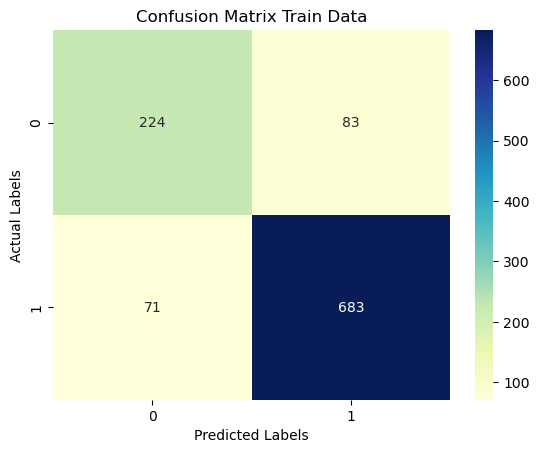

In [103]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


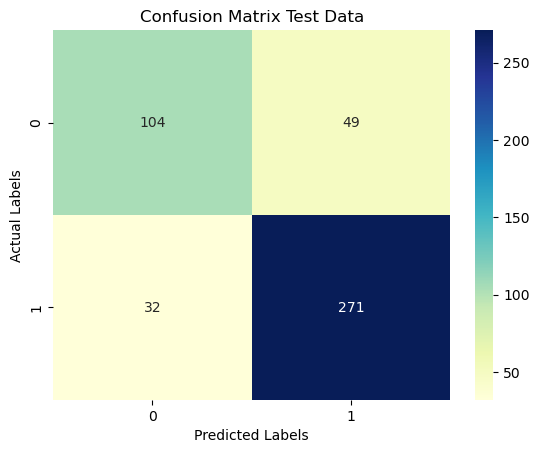

In [104]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.928


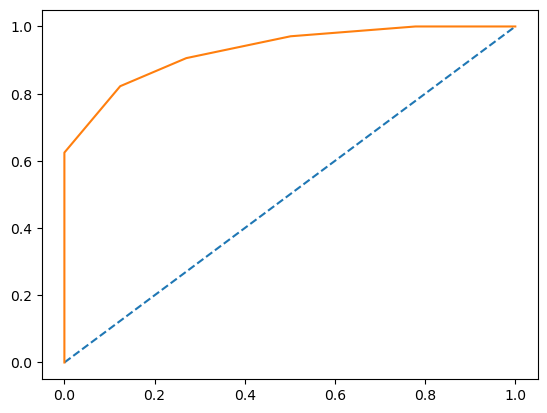

In [105]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.881


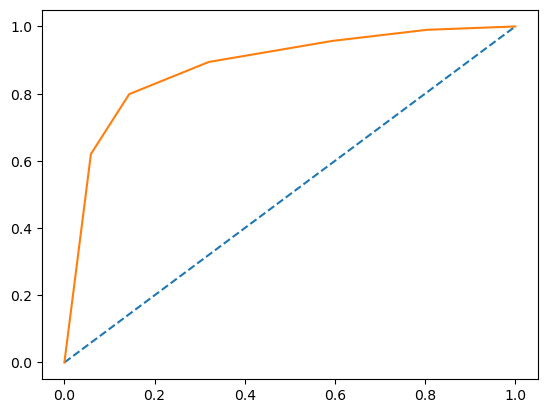

In [106]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [107]:

scores=[]
for i in range(1,20,2):
    KNN_model=KNeighborsClassifier(n_neighbors =i)
    KNN_model.fit(X_train,y_train)
    score=KNN_model.score(X_test, y_test)
    scores.append(score)
print(scores);


[0.7719298245614035, 0.8048245614035088, 0.8223684210526315, 0.8179824561403509, 0.8223684210526315, 0.8201754385964912, 0.831140350877193, 0.8377192982456141, 0.831140350877193, 0.8355263157894737]


In [108]:
import seaborn as sns

MCE=[]
j=1
k=0
for i in scores:
    MCE_score=1-i
    MCE.append(MCE_score)
    print("For n_neighbors =",j,"value of MCE is ",MCE[k])
    j=j+2
    k=k+1
  



For n_neighbors = 1 value of MCE is  0.22807017543859653
For n_neighbors = 3 value of MCE is  0.19517543859649122
For n_neighbors = 5 value of MCE is  0.17763157894736847
For n_neighbors = 7 value of MCE is  0.18201754385964908
For n_neighbors = 9 value of MCE is  0.17763157894736847
For n_neighbors = 11 value of MCE is  0.17982456140350878
For n_neighbors = 13 value of MCE is  0.16885964912280704
For n_neighbors = 15 value of MCE is  0.16228070175438591
For n_neighbors = 17 value of MCE is  0.16885964912280704
For n_neighbors = 19 value of MCE is  0.16447368421052633


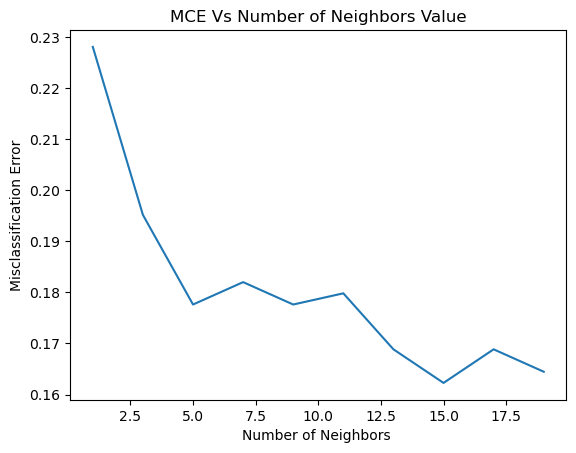

In [109]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Misclassification Error')
plt.title("MCE Vs Number of Neighbors Value");
plt.show()

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 15)
KNN_model=KNeighborsClassifier(n_neighbors = 15)

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)
y_train_predict = KNN_model.predict(X_train)

print(metrics.confusion_matrix(y_test, y_test_predict));
print(metrics.classification_report(y_test, y_test_predict));

print(metrics.confusion_matrix(y_train, y_train_predict));
print(metrics.classification_report(y_train, y_train_predict));

print("Accuracy Score for K=15 Test Data is  ", round(KNN_model.score(X_test, y_test),2));
print("Accuracy Score for K=15 Train data is  ", round(KNN_model.score(X_train, y_train),2));
;


[[108  45]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456

[[213  94]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.85      1061

Accuracy Score for K=15 Test Data is   0.84
Accuracy Score for K=15 Train data is   0.85


''

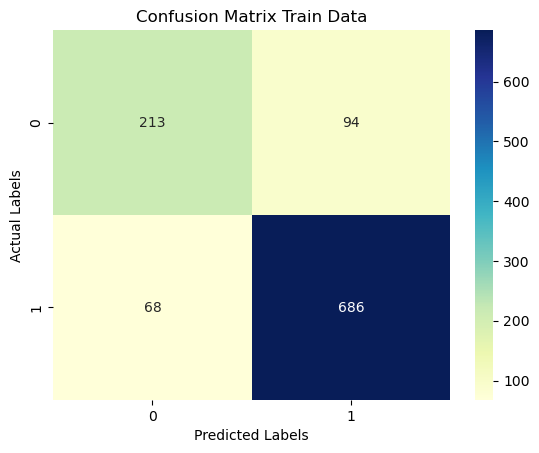

In [111]:
sns.heatmap((metrics.confusion_matrix(y_train, y_train_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

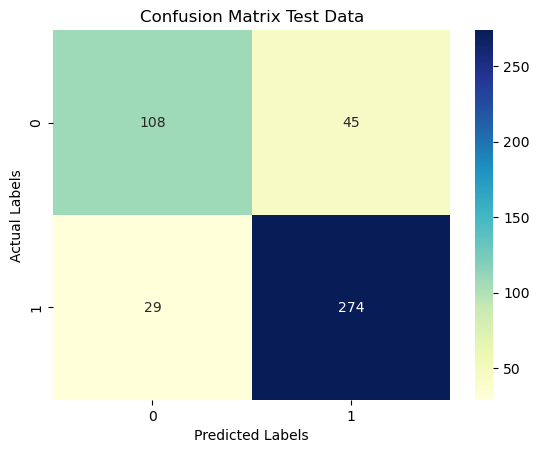

In [112]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.906


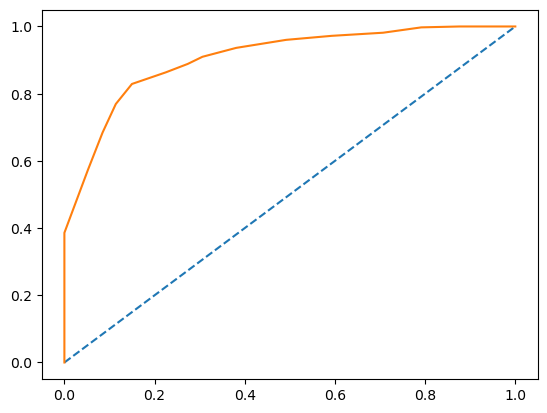

In [115]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.897


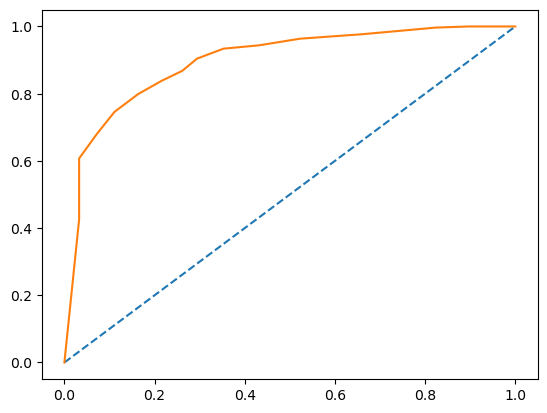

In [114]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [116]:
print("KNN Model Score Post Tuning on train data is %.3f  " % KNN_model.score(X_train, y_train))
print("KNN Model Score Post Tuning on test data is %.3f  " % KNN_model.score(X_test, y_test))

KNN Model Score Post Tuning on train data is 0.847  
KNN Model Score Post Tuning on test data is 0.838  


### KNN Gridsearch CV

In [117]:
grid={'weights':['uniform', 'distance'],
      'metric':['euclidean', 'manhattan','minkowski'],
      'n_neighbors':[1,3, 5, 7, 9, 11, 13,15,17,19]}

In [118]:
KNN_model=KNeighborsClassifier()
grid_search_KNN = GridSearchCV(estimator = KNN_model, param_grid = grid)

In [119]:
grid_search_KNN.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']})

In [120]:
print(grid_search_KNN.best_params_,'\n')
print(grid_search_KNN.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} 

KNeighborsClassifier(metric='manhattan', n_neighbors=13)


In [121]:
best_model_KNN = grid_search_KNN.best_estimator_

In [122]:
ytrain_predict = best_model_KNN.predict(X_train)
ytest_predict = best_model_KNN.predict(X_test)

In [123]:
model_score_test = best_model_KNN.score(X_test, y_test)
print(model_score_test);
print(metrics.confusion_matrix(y_test, ytest_predict));
print(metrics.classification_report(y_test, ytest_predict));


0.8267543859649122
[[102  51]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



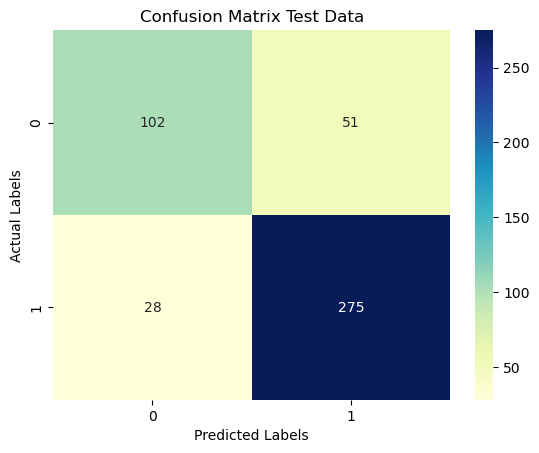

In [124]:
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

In [125]:
model_score_train = best_model_KNN.score(X_train, y_train)
print(model_score_train);
print(metrics.confusion_matrix(y_train, ytrain_predict));
print(metrics.classification_report(y_train, ytrain_predict));

0.8482563619227145
[[215  92]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



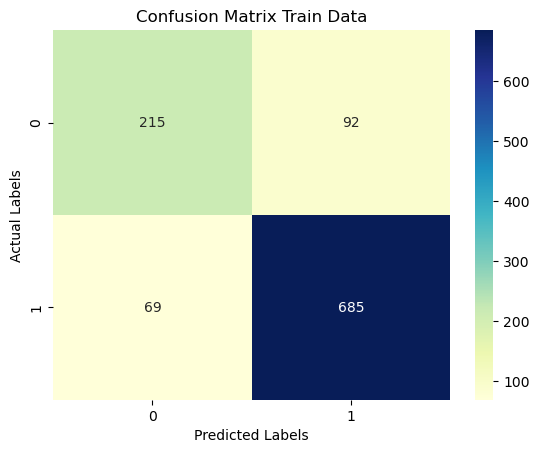

In [126]:
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

AUC: 0.910


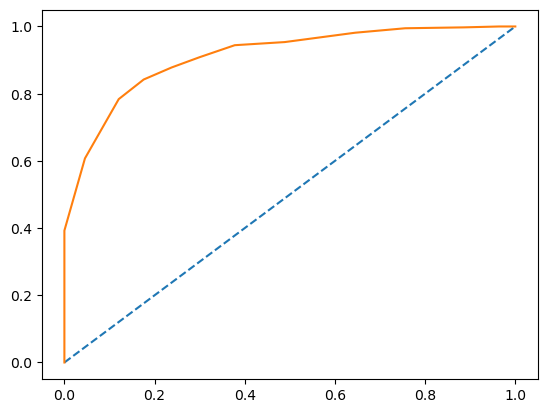

In [127]:
# predict probabilities
probs = best_model_KNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.887


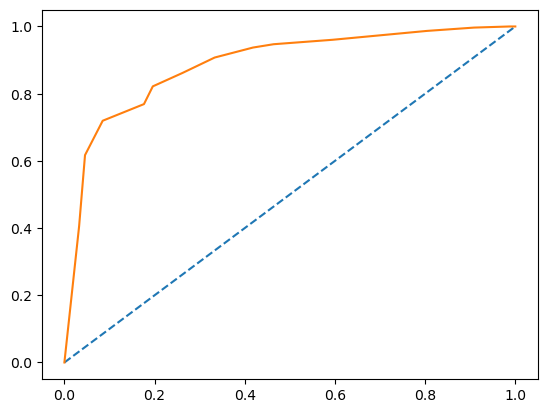

In [128]:
# predict probabilities
probs = best_model_KNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN with SMOTE

In [129]:
from imblearn.over_sampling import SMOTE
#SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [130]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [131]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8879310344827587
[[702  52]
 [117 637]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       754
           1       0.92      0.84      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



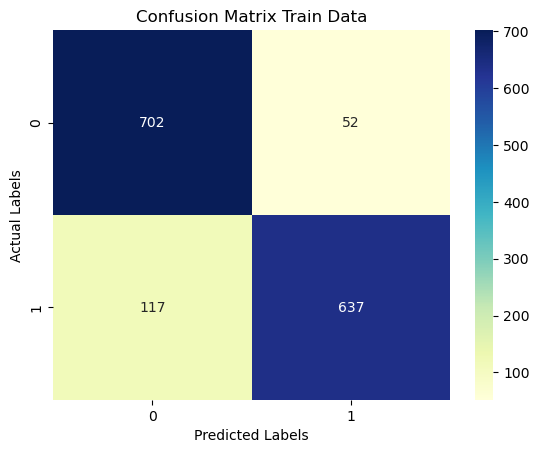

In [132]:
sns.heatmap((metrics.confusion_matrix(y_train_res, y_train_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

In [133]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8026315789473685
[[121  32]
 [ 58 245]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       153
           1       0.88      0.81      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



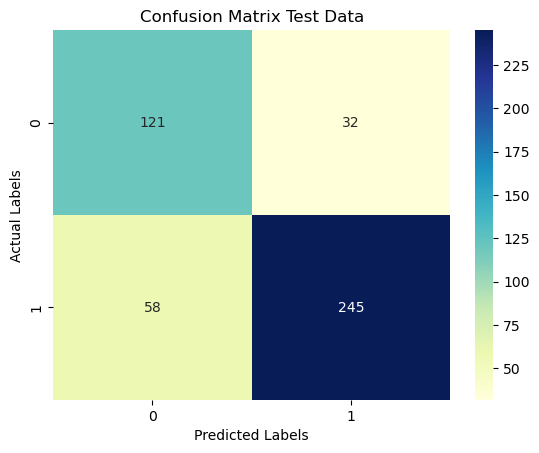

In [134]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.949


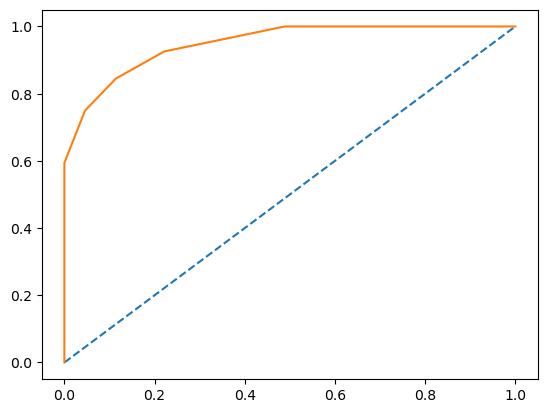

In [135]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.860


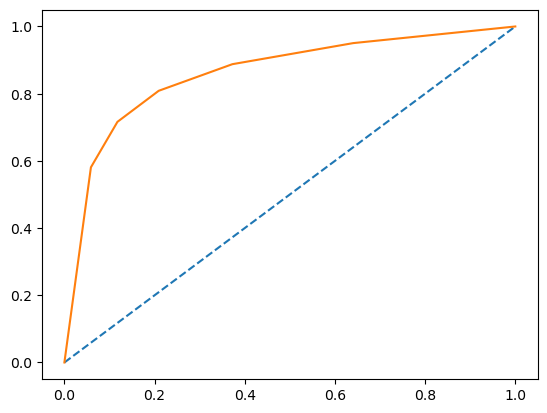

In [136]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Decision Tree

In [136]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [137]:
print(round(dTree.score(X_train, y_train),2))
print(round(dTree.score(X_test, y_test),2))

0.99
0.76


In [138]:
from sklearn import tree

train_char_label = ['0', '1']
Credit_Tree_File = open('d:\credit_tree_ML.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [139]:
pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False)

Imp
Hague                    0.248364
Europe                   0.187103
Blair                    0.138685
economic.cond.household  0.112727
economic.cond.national   0.110913
age_cat                  0.080525
political.knowledge      0.079149
gender_male              0.042534

In [140]:
y_predict = dTree.predict(X_test)
print(dTree.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));


y_predict_train = dTree.predict(X_train)
print(dTree.score(X_train , y_train))
print(metrics.confusion_matrix(y_train, y_predict_train));
print(metrics.classification_report(y_train, y_predict_train));

0.756578947368421
[[ 99  54]
 [ 57 246]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       153
           1       0.82      0.81      0.82       303

    accuracy                           0.76       456
   macro avg       0.73      0.73      0.73       456
weighted avg       0.76      0.76      0.76       456

0.9868049010367578
[[306   1]
 [ 13 741]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.98      0.99       754

    accuracy                           0.99      1061
   macro avg       0.98      0.99      0.98      1061
weighted avg       0.99      0.99      0.99      1061



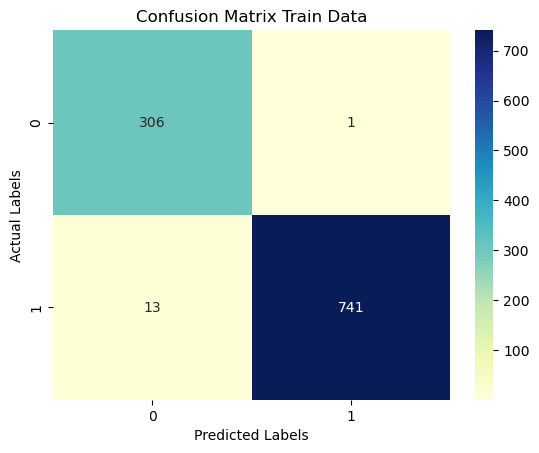

In [141]:
sns.heatmap((metrics.confusion_matrix(y_train, y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

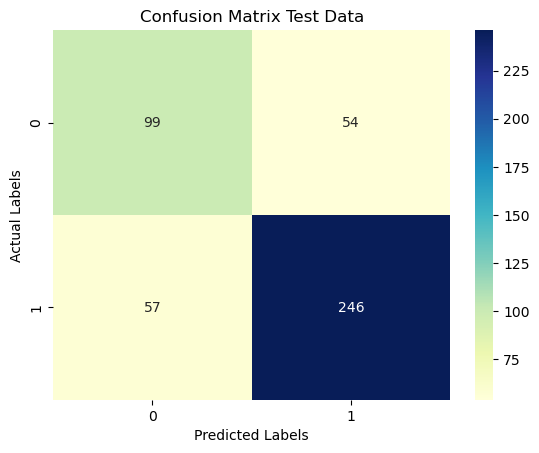

In [142]:
sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 1.000


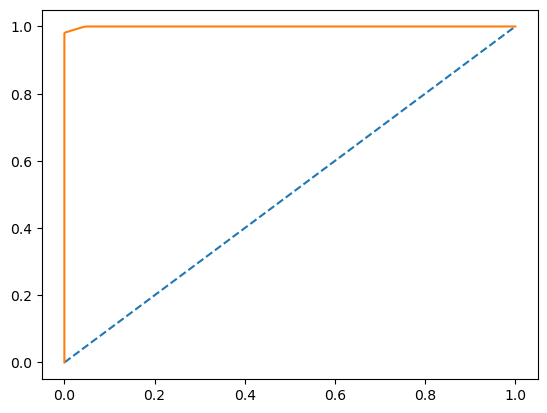

In [143]:
# predict probabilities
probs = dTree.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.734


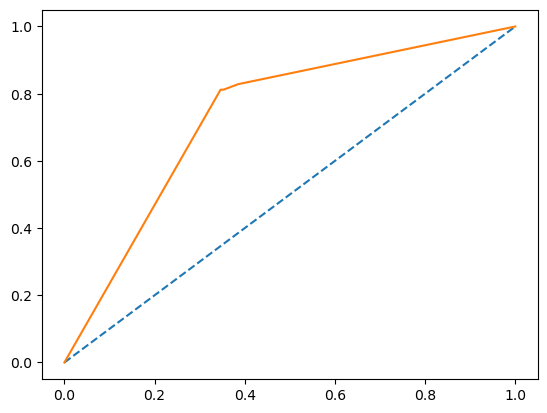

In [144]:
# predict probabilities
probs = dTree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Reducing over fitting (Regularization)

In [145]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(X_train, y_train)
print(round(dTreeR.score(X_train, y_train),2))
print(round(dTreeR.score(X_test, y_test),2))

0.86
0.81


In [146]:
from sklearn import tree

train_char_label = ['0', '1']
Credit_Tree_File = open('d:\credit_tree_ML_reg.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [147]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by="Imp",ascending=False).sort_values(by='Imp',ascending=False)

Imp
Hague                    0.404606
Blair                    0.222475
Europe                   0.150744
economic.cond.national   0.083682
political.knowledge      0.079131
economic.cond.household  0.037927
age_cat                  0.021434
gender_male              0.000000

In [148]:
y_predict = dTreeR.predict(X_test)
print(dTreeR.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));


y_predict_train = dTreeR.predict(X_train)
print(dTreeR.score(X_train , y_train))
print(metrics.confusion_matrix(y_train, y_predict_train));
print(metrics.classification_report(y_train, y_predict_train));

0.8092105263157895
[[111  42]
 [ 45 258]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       153
           1       0.86      0.85      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.81      0.81      0.81       456

0.8557964184731386
[[229  78]
 [ 75 679]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       307
           1       0.90      0.90      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061



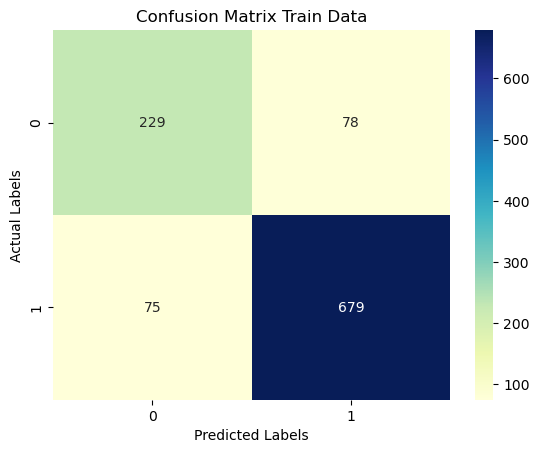

In [149]:
sns.heatmap((metrics.confusion_matrix(y_train, y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

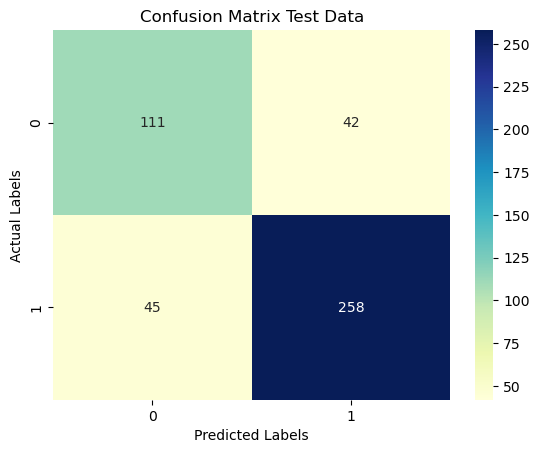

In [150]:
sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.910


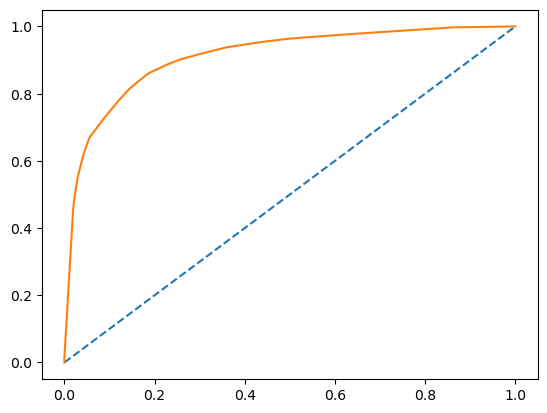

In [151]:
# predict probabilities
probs = dTreeR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.845


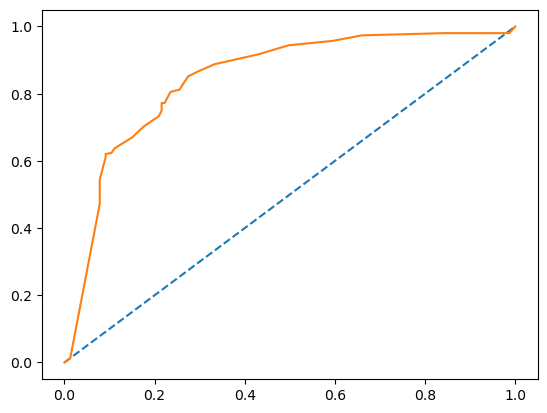

In [152]:
# predict probabilities
probs = dTreeR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Bagging DecisionTreeClassifier

In [137]:
from sklearn.ensemble import BaggingClassifier
cart = DecisionTreeClassifier()
bgcl = BaggingClassifier(base_estimator=cart, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [138]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));

y_predict_train = bgcl.predict(X_train)
print(bgcl.score(X_train , y_train))
print(metrics.confusion_matrix(y_train, y_predict_train));
print(metrics.classification_report(y_train, y_predict_train));


0.8026315789473685
[[ 99  54]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       153
           1       0.83      0.88      0.86       303

    accuracy                           0.80       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456

0.9905749293119699
[[301   6]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       307
           1       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



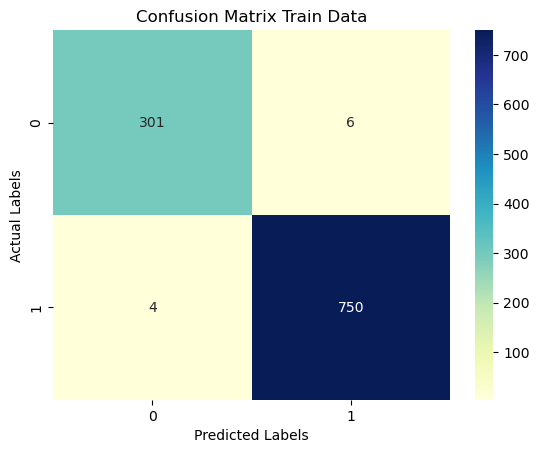

In [139]:
sns.heatmap((metrics.confusion_matrix(y_train, y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

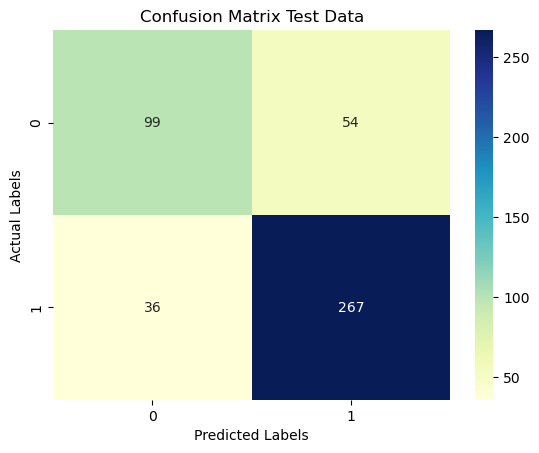

In [140]:
sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 1.000


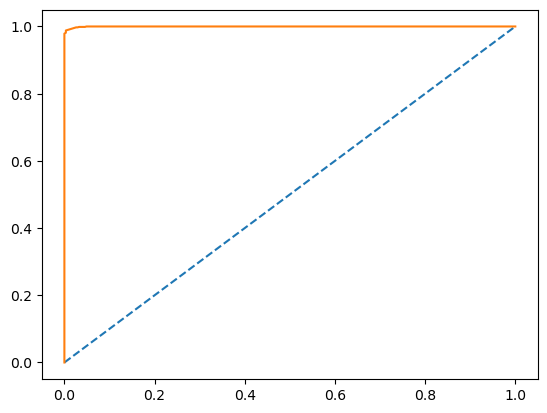

In [141]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.871


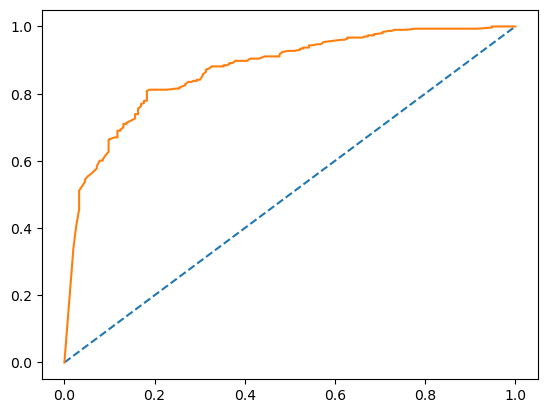

In [142]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Bagging Random Forest Classifier

In [143]:
from sklearn.ensemble import BaggingClassifier
cart=RandomForestClassifier()

bgcl = BaggingClassifier(base_estimator=cart, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [144]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));

y_predict_train = bgcl.predict(X_train)
print(bgcl.score(X_train , y_train))
print(metrics.confusion_matrix(y_train, y_predict_train));
print(metrics.classification_report(y_train, y_predict_train));

0.8333333333333334
[[102  51]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456

0.9622997172478793
[[274  33]
 [  7 747]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



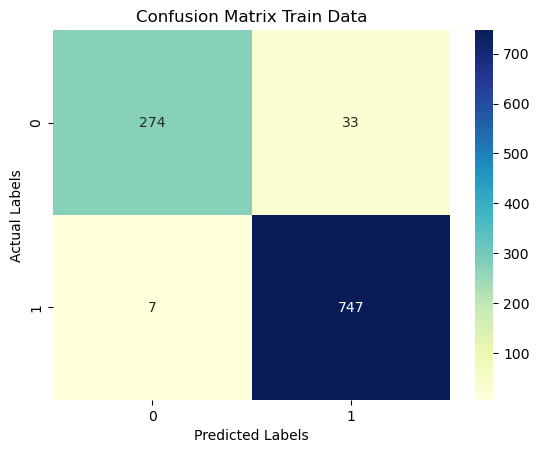

In [145]:
sns.heatmap((metrics.confusion_matrix(y_train, y_predict_train)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

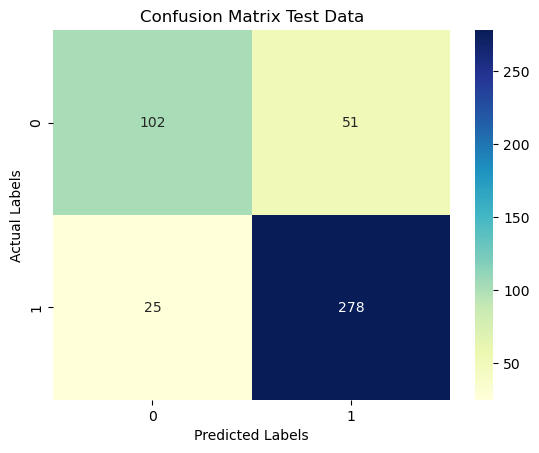

In [146]:
sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC: 0.996


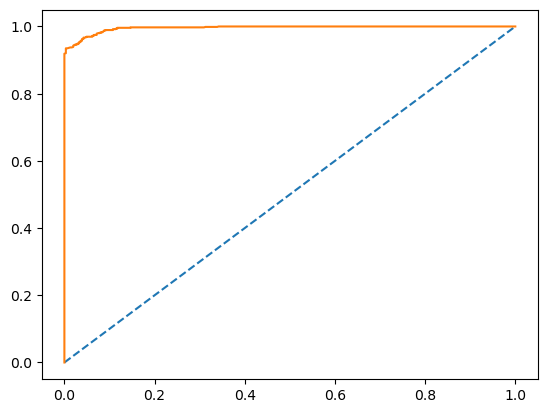

In [147]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.891


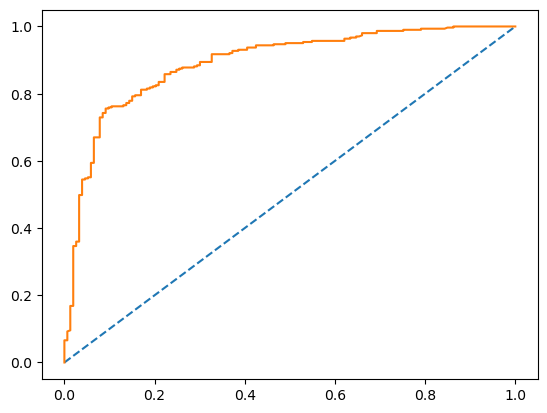

In [148]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Ensemble Learning - AdaBoosting

In [149]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [150]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));



0.8289473684210527
[[106  47]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



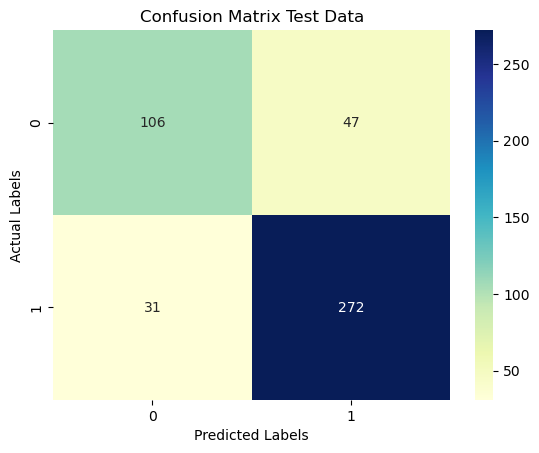

In [151]:
sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

In [152]:
y_predict_tr = abcl.predict(X_train)
print(abcl.score(X_train , y_train))
print(metrics.confusion_matrix(y_train, y_predict_tr));
print(metrics.classification_report(y_train, y_predict_tr));

0.8454288407163054
[[211  96]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



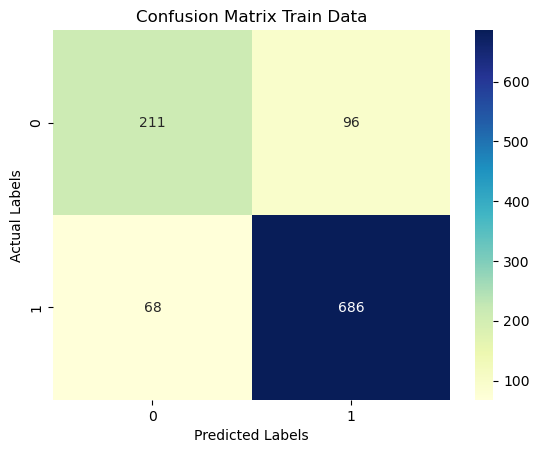

In [153]:
sns.heatmap((metrics.confusion_matrix(y_train, y_predict_tr)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()

AUC: 0.905


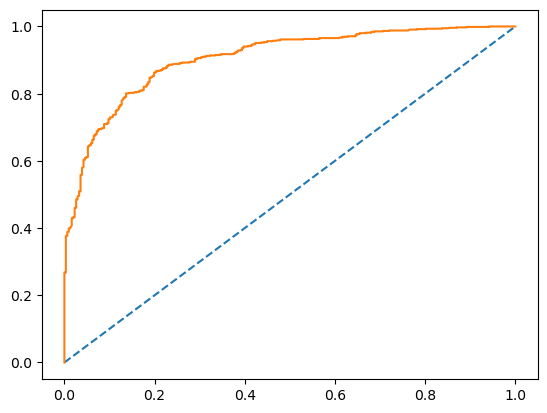

In [154]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.881


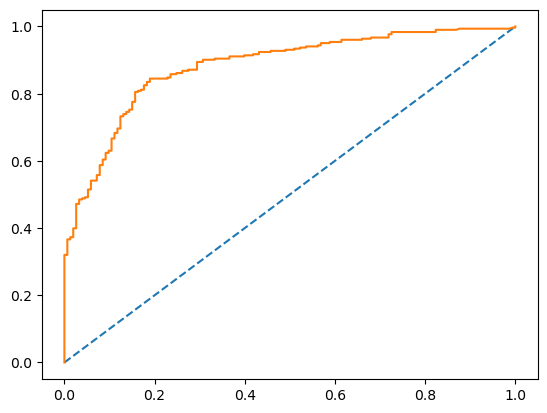

In [155]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Ensemble Learning - GradientBoost

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8289473684210527
[[102  51]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



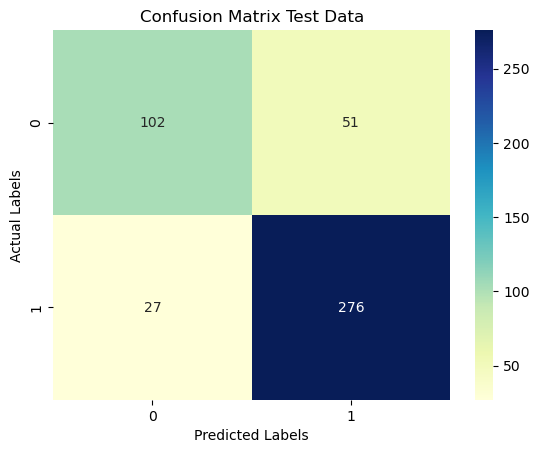

In [157]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict));
print(metrics.classification_report(y_test, y_predict));

sns.heatmap((metrics.confusion_matrix(y_test, y_predict)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()


0.8878416588124411
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       307
           1       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.89      0.89      0.89      1061



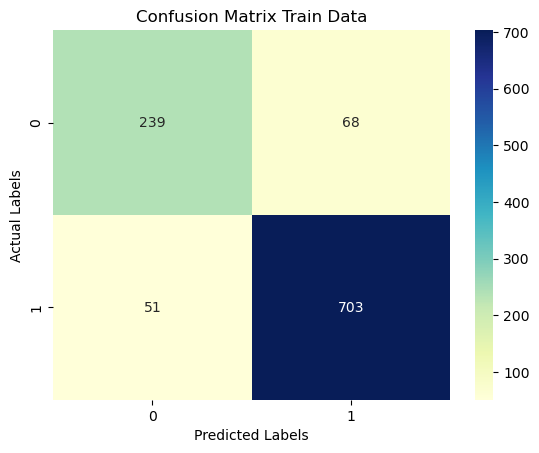

In [158]:
y_predict_tr = gbcl.predict(X_train)
print(gbcl.score(X_train , y_train))
print(metrics.classification_report(y_train, y_predict_tr));

sns.heatmap((metrics.confusion_matrix(y_train, y_predict_tr)),annot=True,fmt='g',cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


AUC: 0.944


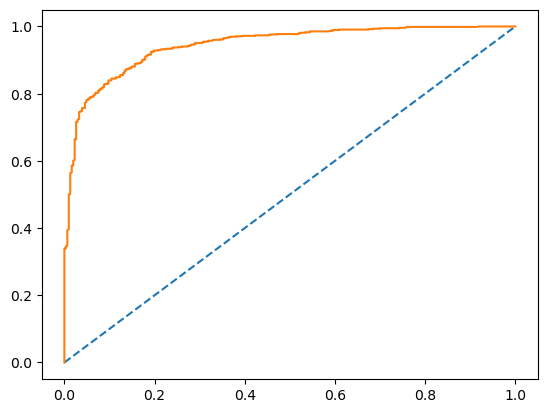

In [159]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.899


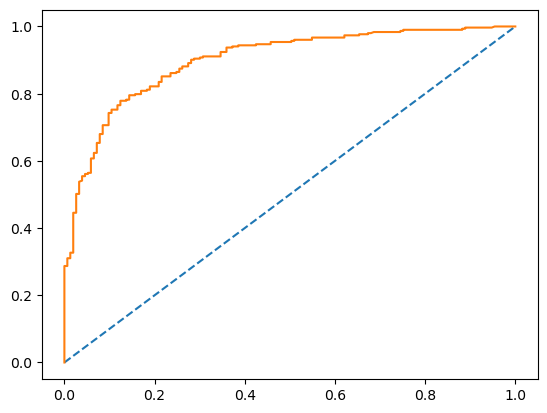

In [160]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Ensemble RandomForest Classifier

In [161]:

rfcl = RandomForestClassifier(random_state=1,n_estimators=100)
rfcl = rfcl.fit(X_train, y_train)

0.8114035087719298
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



<AxesSubplot:>

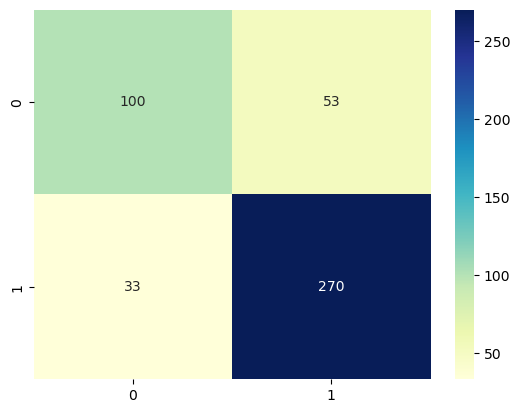

In [162]:
y_predict = rfcl.predict(X_test)

y_predict_train = rfcl.predict(X_train)

print(rfcl.score(X_test , y_test))
print(metrics.classification_report(y_test, y_predict));
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True ,fmt='g',cmap='YlGnBu')



0.9905749293119699
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       307
           1       0.99      1.00      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



<AxesSubplot:>

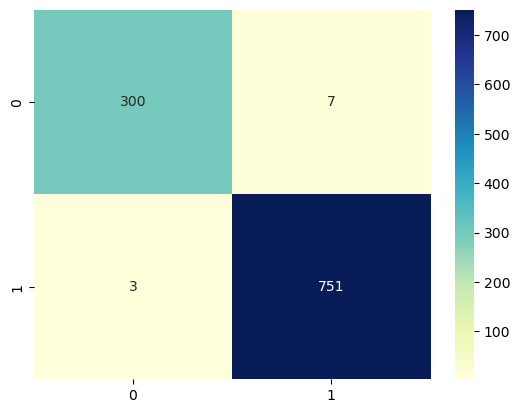

In [163]:
print(rfcl.score(X_train , y_train))
print(metrics.classification_report(y_train, y_predict_train));
cm1=metrics.confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm1, annot=True ,fmt='g',cmap='YlGnBu')

AUC: 1.000


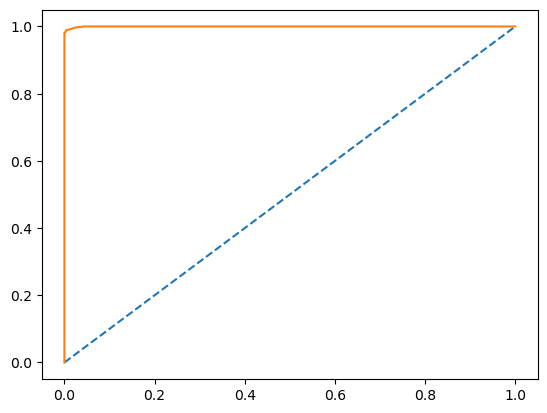

In [164]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.882


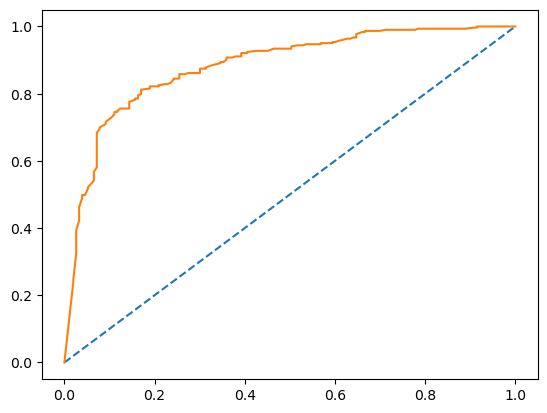

In [165]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Cross Validation

In [166]:
from sklearn.model_selection import cross_val_score


In [167]:
scores = cross_val_score(best_model_LDA, X_train, y_train, cv=10)
scores


array([0.77570093, 0.77358491, 0.83962264, 0.85849057, 0.85849057,
       0.85849057, 0.80188679, 0.8490566 , 0.82075472, 0.81132075])

In [168]:
scores = cross_val_score(best_model_lr, X_test, y_test, cv=10)
scores


array([0.80434783, 0.76086957, 0.89130435, 0.82608696, 0.89130435,
       0.86956522, 0.91111111, 0.84444444, 0.71111111, 0.82222222])